# Исследовательский анализ данных

## Цели проекта

## Основные гипотзы

## 1. Загрузка и первичный осмотр данных

In [5]:
import pandas as pd
import numpy as np

import datetime as dt
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
df = pd.read_csv('AB_NYC_2019.csv')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
print(f'размер датасета {df.shape}')

размер датасета (48895, 16)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Обнаружены проблемы:

In [12]:
df[(df['last_review'].isna())]['number_of_reviews'].value_counts()

number_of_reviews
0    10052
Name: count, dtype: int64

In [13]:
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')

In [14]:
df[(df['reviews_per_month'].isna())&(df['number_of_reviews']!=0)]['number_of_reviews']

Series([], Name: number_of_reviews, dtype: int64)

In [15]:
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [16]:
df_copy = df.copy()

In [17]:
df['price'].quantile(0.995)

1000.0

<Axes: >

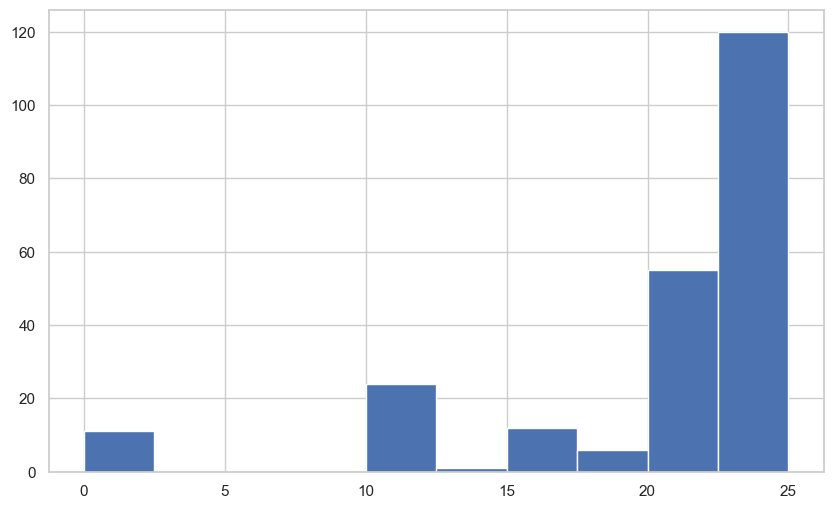

In [18]:
df['price'].hist(range = (0, 25))

In [19]:
len(df[(df['price']>1000)&(df['number_of_reviews'] >= 10)].sort_values('price', ascending=False))

42

In [20]:
df_copy = df_copy[
    ((df_copy['price'] <= 1000) | 
         ((df_copy['price'] > 1000) & (df_copy['number_of_reviews'] >= 10))) & 
    (df_copy['price'] != 0) &
    (df_copy['minimum_nights'] <= 365)
]

In [21]:
df['number_of_reviews'].quantile(0.99)

214.0

<Axes: >

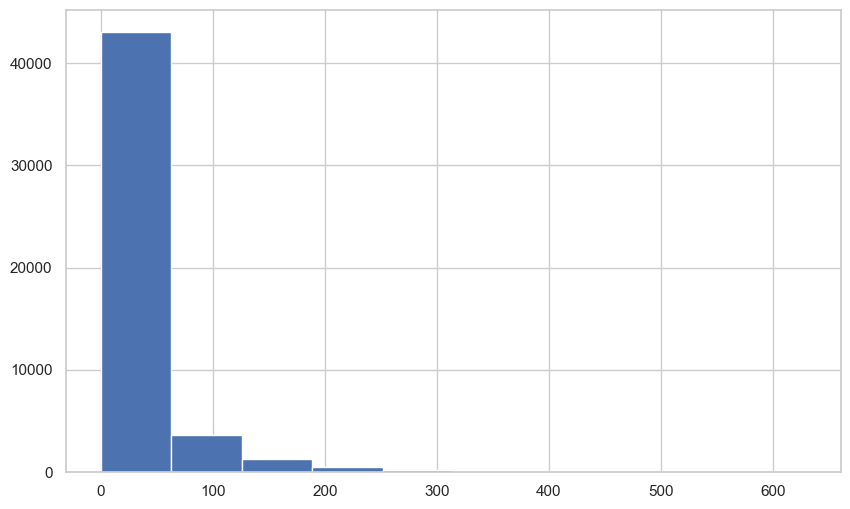

In [22]:
df_copy.number_of_reviews.hist()

<Axes: xlabel='price'>

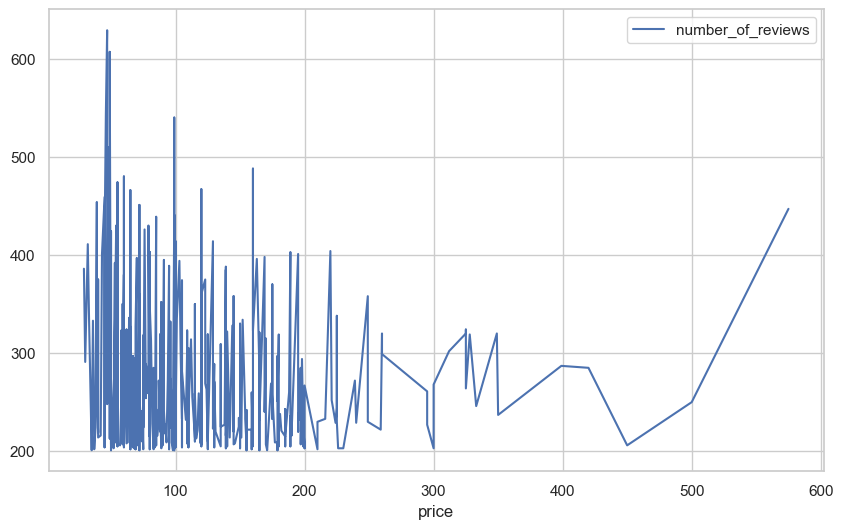

In [23]:
df.query('number_of_reviews > 200') \
        .sort_values('price') \
        .plot(x='price', y='number_of_reviews', kind='line')

<Axes: title={'center': 'smooth price vs number_of_reviews\n'}, xlabel='price', ylabel='number_of_reviews\n'>

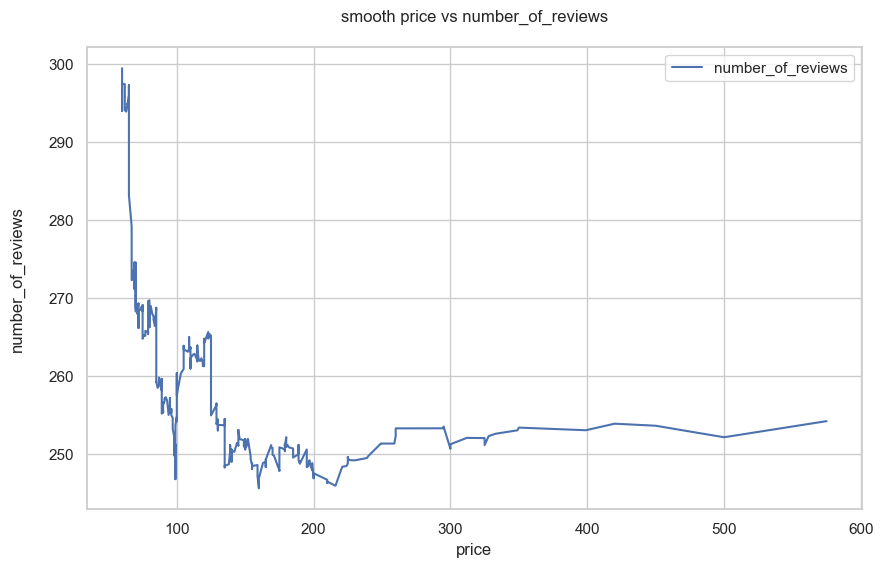

In [24]:
df_smooth = (
    df_copy.query('number_of_reviews > 200')
      .sort_values('price')[['price', 'number_of_reviews']]
      .rolling(window=100, on='price')
      .mean()
)

df_smooth.plot(
            x='price', 
            y='number_of_reviews', 
            kind='line', 
            ylabel = 'number_of_reviews\n', 
            title = 'smooth price vs number_of_reviews\n')

In [25]:
df_copy = df_copy.reset_index(drop = True)

### Результат

In [27]:
df = df_copy.copy()

In [28]:
df.shape

(48673, 16)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48673 entries, 0 to 48672
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48673 non-null  int64         
 1   name                            48658 non-null  object        
 2   host_id                         48673 non-null  int64         
 3   host_name                       48652 non-null  object        
 4   neighbourhood_group             48673 non-null  object        
 5   neighbourhood                   48673 non-null  object        
 6   latitude                        48673 non-null  float64       
 7   longitude                       48673 non-null  float64       
 8   room_type                       48673 non-null  object        
 9   price                           48673 non-null  int64         
 10  minimum_nights                  48673 non-null  int64         
 11  nu

In [30]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.867300e+04,4.867300e+04,48673.000000,48673.000000,48673.000000,48673.000000,48673.000000,38762,48673.000000,48673.000000,48673.000000
mean,1.901323e+07,6.761509e+07,40.728945,-73.952075,142.723543,6.793335,23.366980,2018-10-04 12:08:52.727929344,1.094886,7.159760,112.482999
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.471893e+06,7.824337e+06,40.690040,-73.983000,69.000000,1.000000,1.000000,2018-07-10 00:00:00,0.040000,1.000000,0.000000
50%,1.967308e+07,3.081281e+07,40.723000,-73.955630,105.000000,3.000000,5.000000,2019-05-19 00:00:00,0.380000,1.000000,45.000000
75%,2.913442e+07,1.074344e+08,40.763130,-73.936160,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.600000,2.000000,226.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,6000.000000,365.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098015e+07,7.859487e+07,0.054557,0.046163,129.412434,16.205591,44.623846,NaN,1.599102,33.017401,131.449547


## Нормализация данных

In [32]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365


In [33]:
df[['latitude', 'longitude']].drop_duplicates().shape[0]

48650

In [34]:
hosts = df[['host_id', 'host_name']].drop_duplicates().reset_index(drop=True)
hosts.head()

,host_id,host_name
0,2787,John
1,2845,Jennifer
2,4632,Elisabeth
3,4869,LisaRoxanne
4,7192,Laura


In [35]:
len(df[~df['host_id'].isin(hosts['host_id'])])


0

In [36]:
locality = df[['neighbourhood_group', 'neighbourhood']]\
        .drop_duplicates() \
        .reset_index(drop = True) \
        .sort_values('neighbourhood_group')

locality.index.name = 'neigh_id'
locality.reset_index(inplace=True)
locality.head(2)

,neigh_id,neighbourhood_group,neighbourhood
0,192,Bronx,Schuylerville
1,134,Bronx,North Riverdale


In [37]:
df = df.merge(locality,  on = (['neighbourhood_group', 'neighbourhood']))
df = df.drop(columns=['neighbourhood_group', 'neighbourhood','host_name'])

In [38]:
len(df[~df['neigh_id'].isin(locality['neigh_id'])])

0

In [39]:
df.head(2)

,id,name,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neigh_id
0,2539,Clean & quiet apt home by the park,2787,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1


### Результат

## Разведочный анализ

In [42]:
df.head(3)

,id,name,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neigh_id
0,2539,Clean & quiet apt home by the park,2787,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,2


In [43]:
numeric = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365' ]

In [44]:
categorical = ['room_type']

In [45]:
df[numeric].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48673.000000,48673.000000,48673.000000,48673.000000,48673.000000,48673.000000
mean,142.723543,6.793335,23.366980,1.094886,7.159760,112.482999
std,129.412434,16.205591,44.623846,1.599102,33.017401,131.449547
min,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,105.000000,3.000000,5.000000,0.380000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.600000,2.000000,226.000000
max,6000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


#### price

<Axes: >

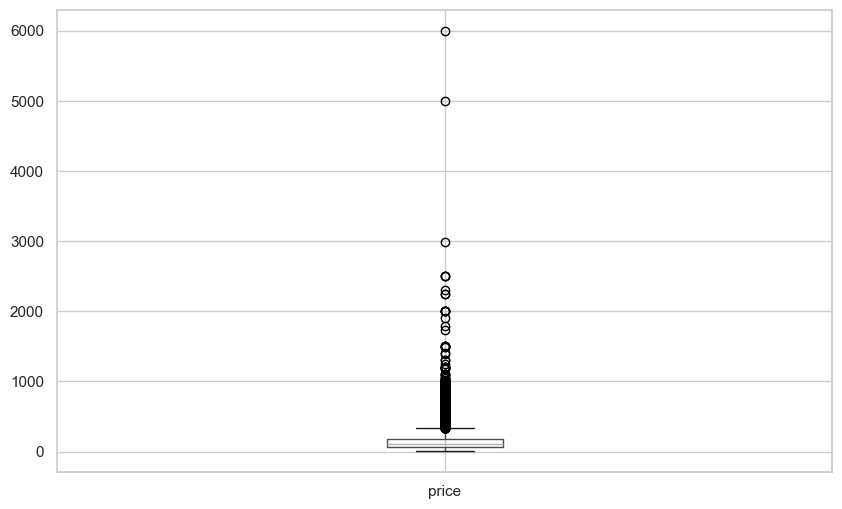

In [47]:
df[['price']].boxplot()

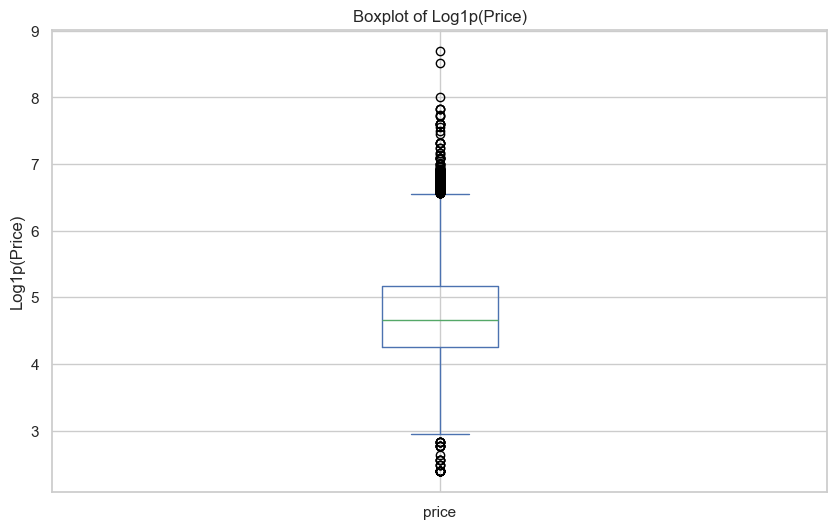

In [48]:
np.log1p(df['price']).plot.box()
plt.title('Boxplot of Log1p(Price)')
plt.ylabel('Log1p(Price)')
plt.show()

<Axes: >

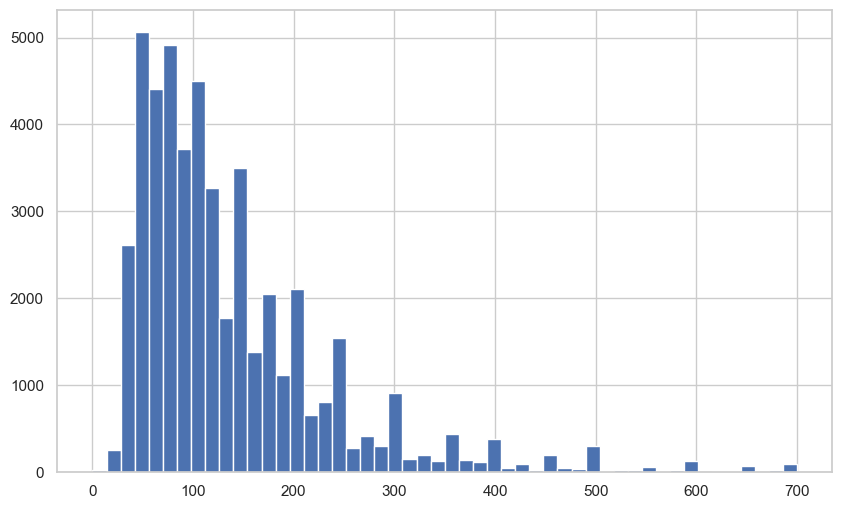

In [49]:
df['price'].hist(bins = 50, range = (0, 700))

<Axes: >

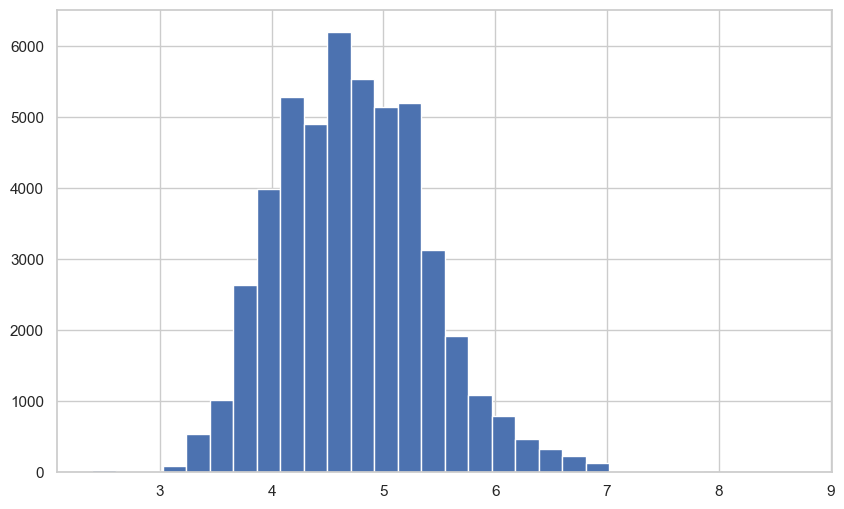

In [50]:
np.log1p(df['price']).hist(bins = 30)

#### number_of_reviews

<Axes: >

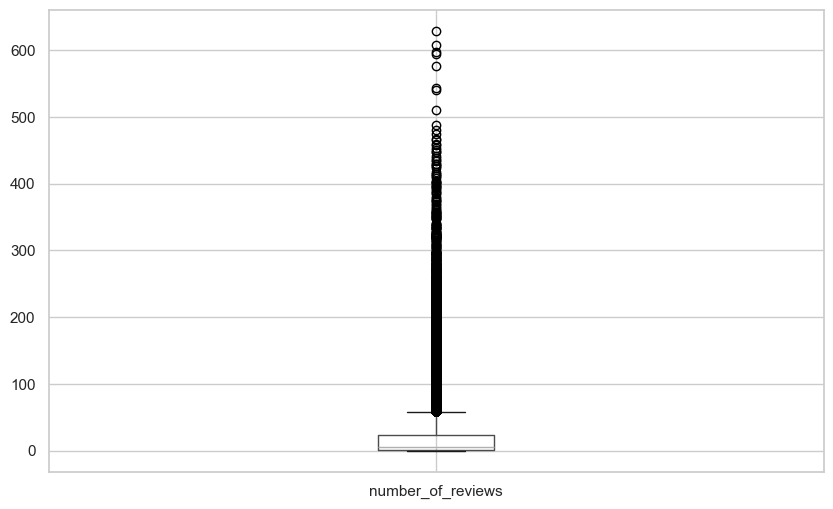

In [52]:
df[['number_of_reviews']].boxplot()

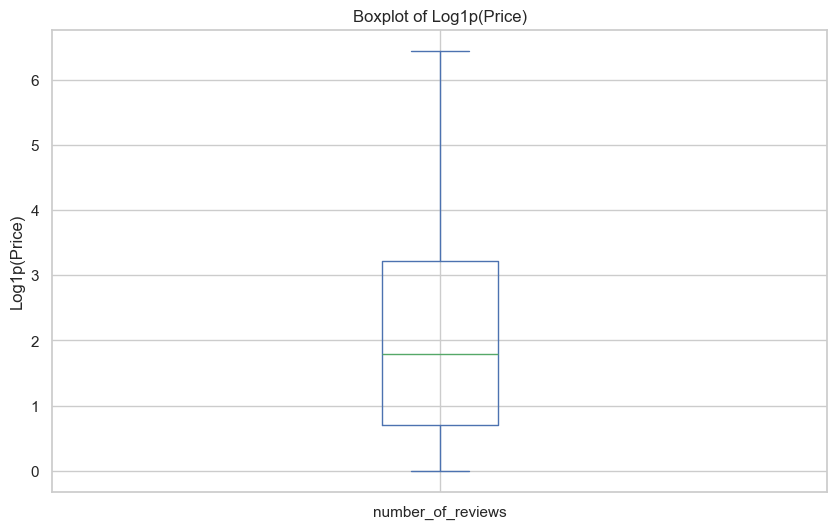

In [53]:
np.log1p(df['number_of_reviews']).plot.box()
plt.title('Boxplot of Log1p(Price)')
plt.ylabel('Log1p(Price)')
plt.show()

<Axes: >

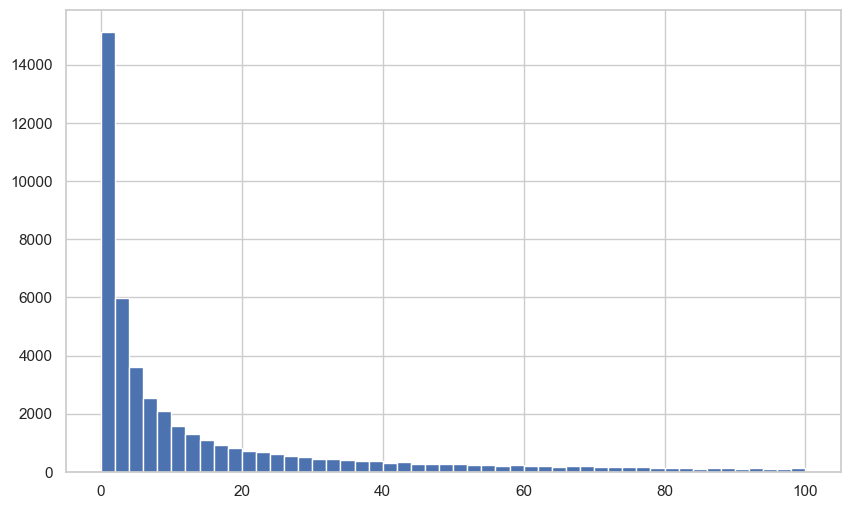

In [54]:
df['number_of_reviews'].hist(bins = 50, range = (0, 100))

<Axes: >

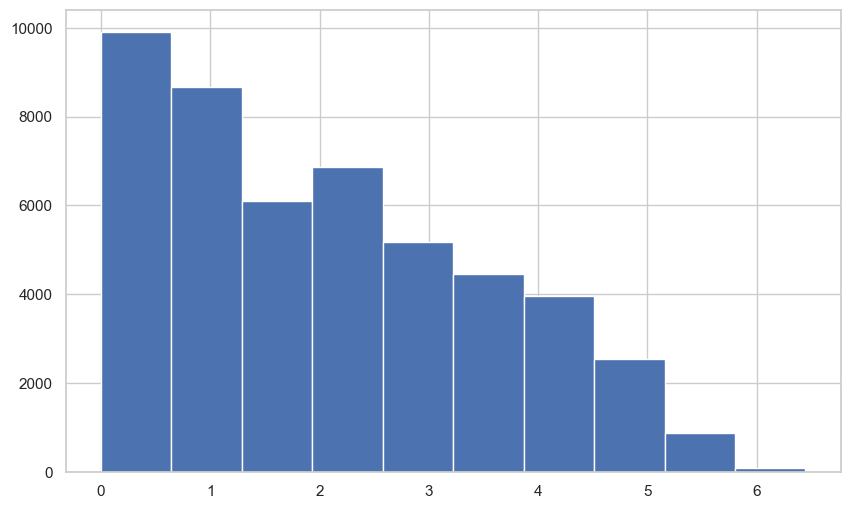

In [55]:
np.log1p(df['number_of_reviews']).hist()

#### minimum_nights

<Axes: >

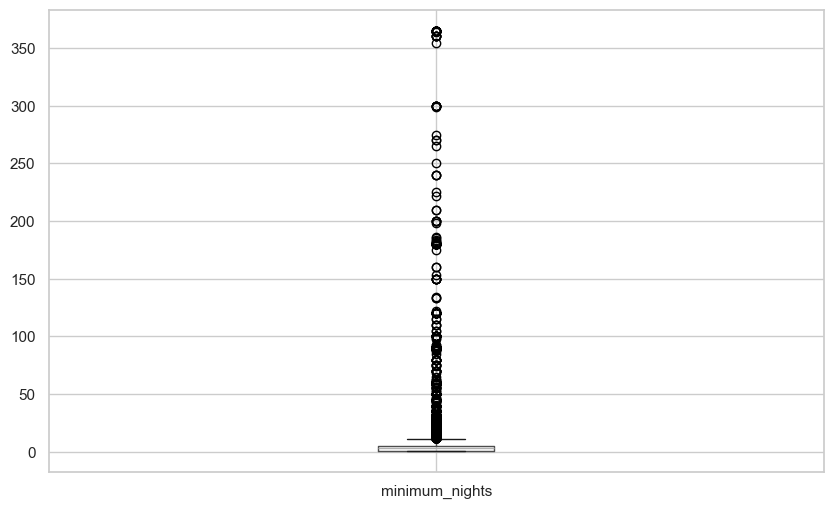

In [57]:
df[['minimum_nights']].boxplot()

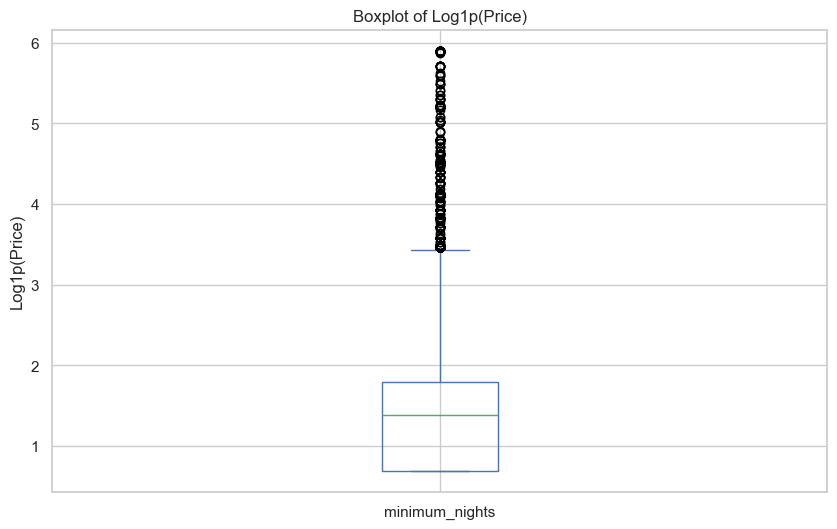

In [58]:
np.log1p(df['minimum_nights']).plot.box()
plt.title('Boxplot of Log1p(Price)')
plt.ylabel('Log1p(Price)')
plt.show()


<Axes: >

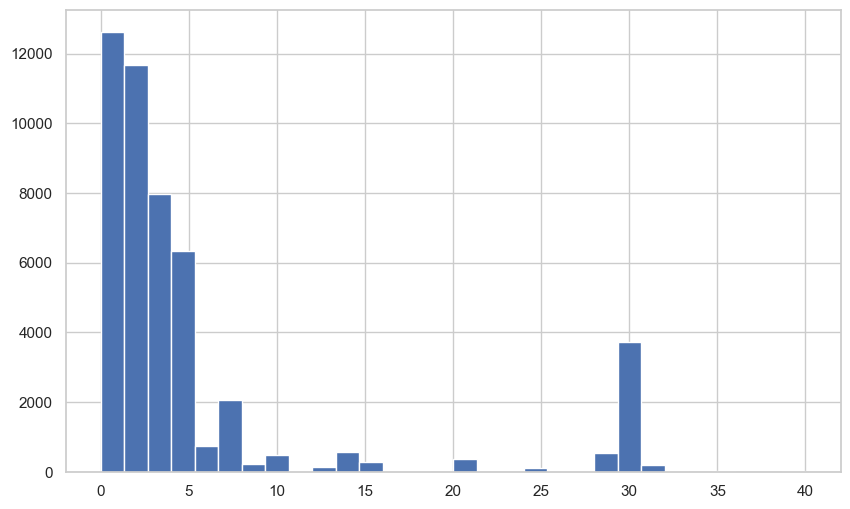

In [59]:
df['minimum_nights'].hist(bins = 30, range = (0, 40))

<Axes: >

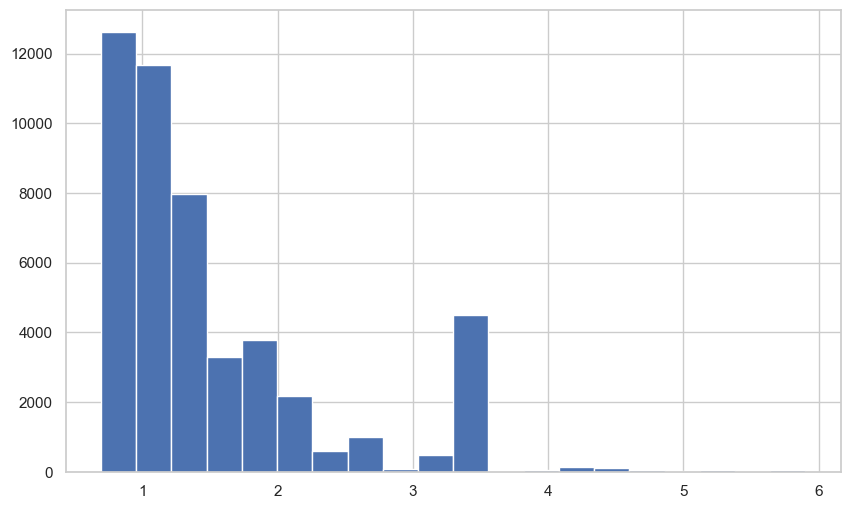

In [60]:
np.log1p(df['minimum_nights']).hist(bins = 20)

#### room_type

<Axes: >

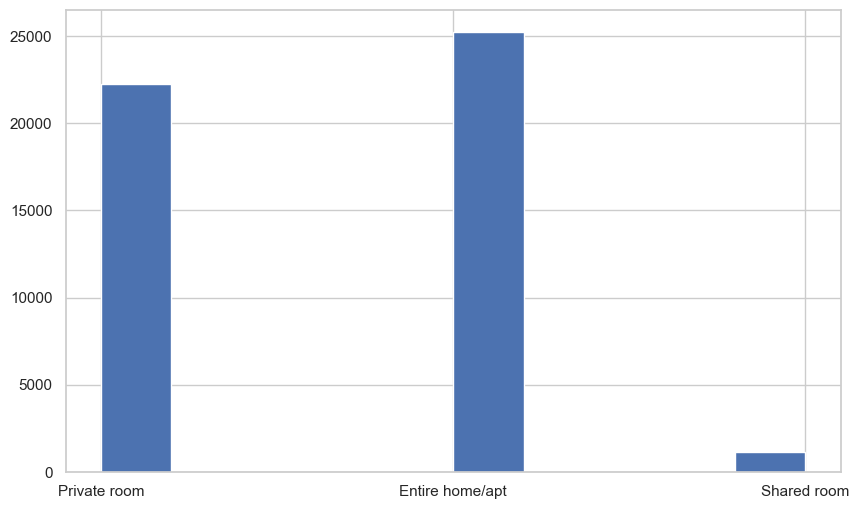

In [62]:
df['room_type'].hist()

#### neighbourhood

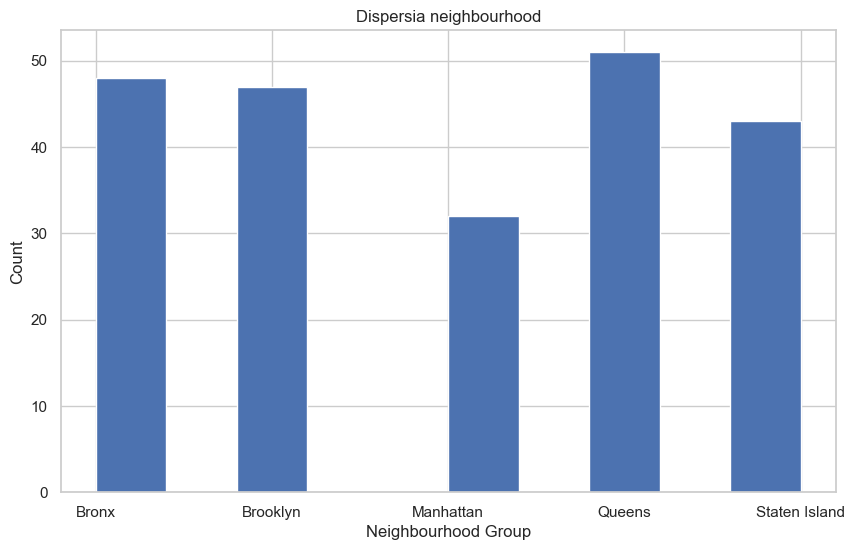

In [64]:
locality['neighbourhood_group'].hist()
plt.title('Dispersia neighbourhood')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

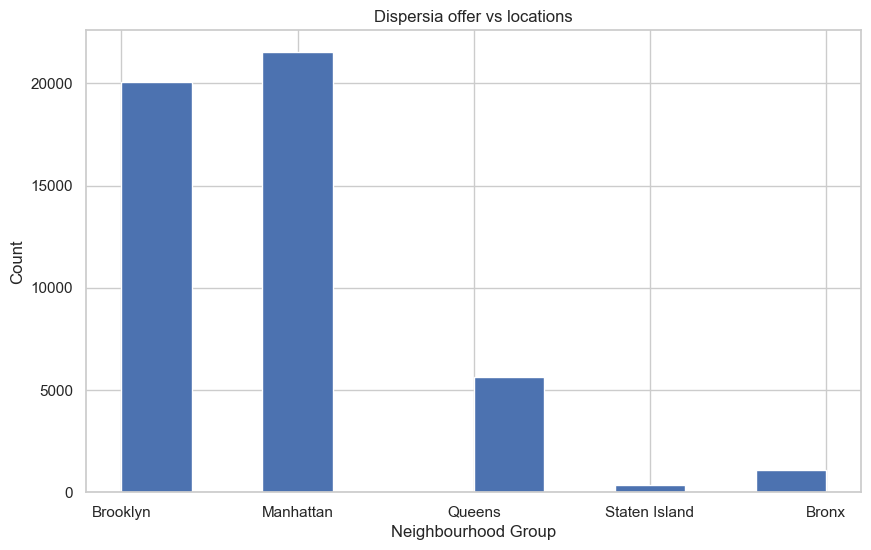

In [65]:
(df.merge(locality, on = 'neigh_id')['neighbourhood_group']).hist()
plt.title('Dispersia offer vs locations')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

#### Зависимости

##### 1. цена-тип комнаты

Text(0.5, 1.0, 'log(price) vs type_room')

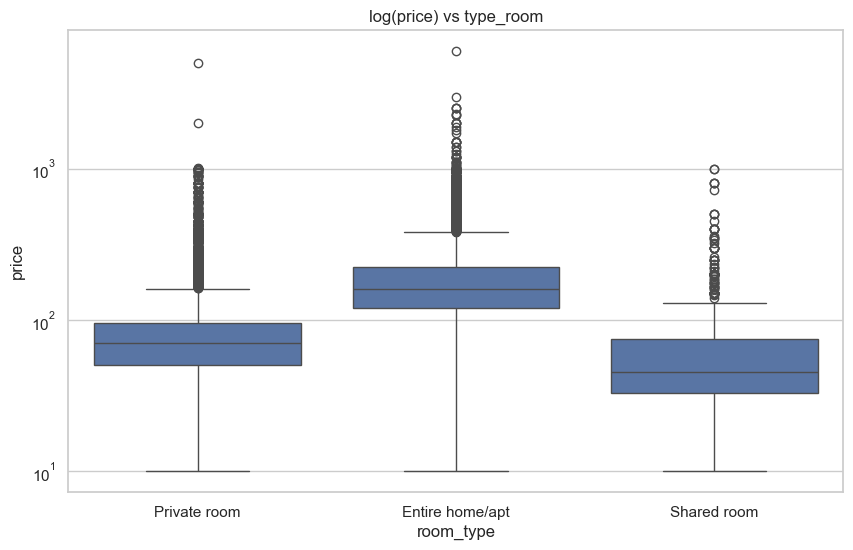

In [68]:
sns.boxplot(df, x = 'room_type', y = 'price')
plt.yscale('log')
plt.title('log(price) vs type_room')

##### 2. географя - цена

In [70]:
price_location_df = df.merge(locality, on = 'neigh_id')[['price', 'neighbourhood_group', 'neighbourhood']]
price_location_df.head(2)

,price,neighbourhood_group,neighbourhood
0,149,Brooklyn,Kensington
1,225,Manhattan,Midtown


Text(0.5, 1.0, 'log(price) vs neighbourhood_group')

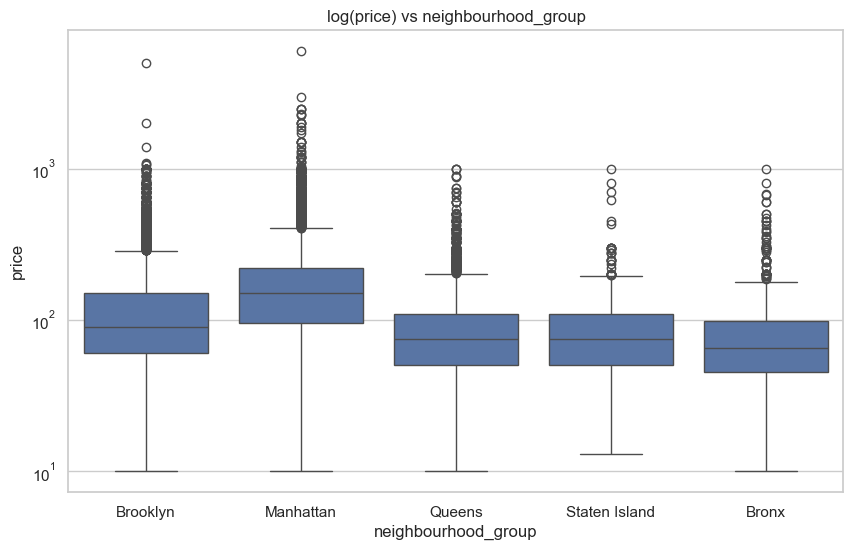

In [71]:
sns.boxplot(price_location_df, x = 'neighbourhood_group', y = 'price')
plt.yscale('log')
plt.title('log(price) vs neighbourhood_group')

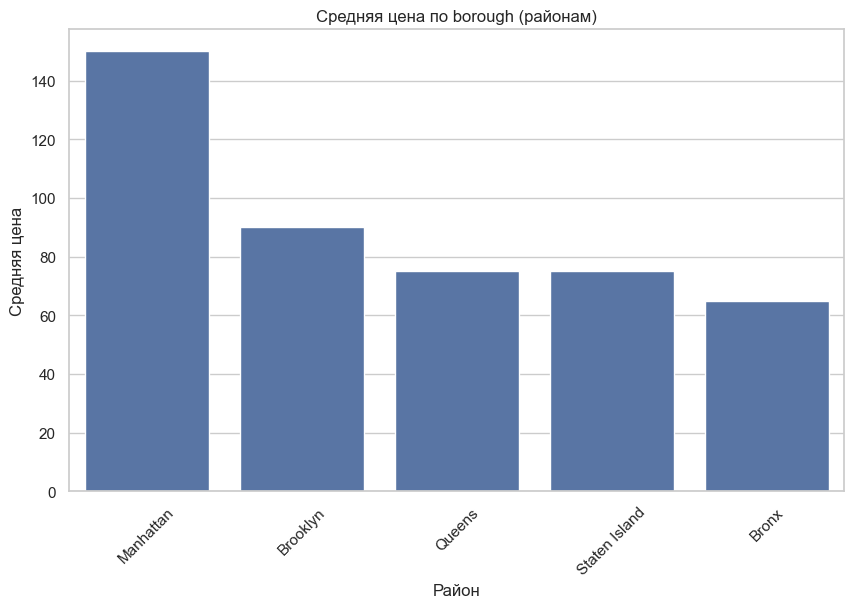

In [72]:
avg_price = price_location_df.groupby("neighbourhood_group")["price"].median().sort_values(ascending=False)

sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Средняя цена по borough (районам)")
plt.ylabel("Средняя цена")
plt.xlabel("Район")
plt.xticks(rotation=45)
plt.show()

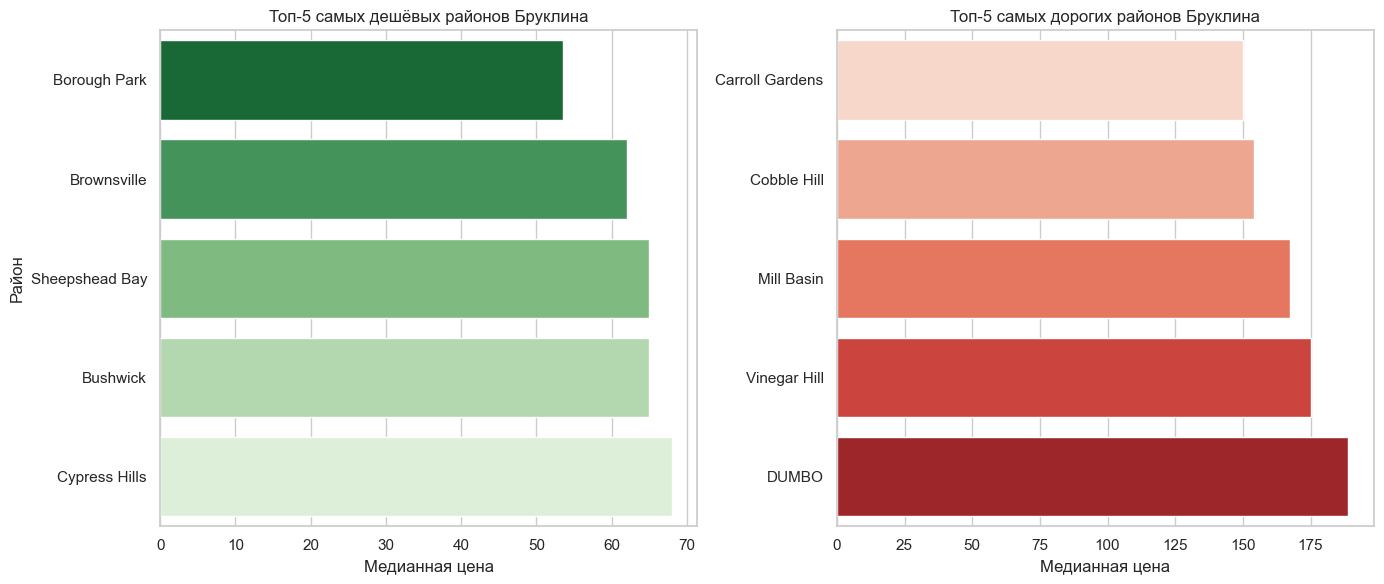

In [73]:
# нужно ли делать для каждого??? поянтное дело что есть дорогие и дешевые?????
brook = price_location_df.query('neighbourhood_group == "Brooklyn"')

sns.set(style="whitegrid")

median_prices = brook.groupby('neighbourhood')['price'].median().sort_values()

cheapest = median_prices.head()
most_expensive = median_prices.tail()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    x=cheapest.values, 
    y=cheapest.index, 
    hue=cheapest.index, 
    palette="Greens_r", 
    ax=axes[0], 
    legend=False
)
axes[0].set_title('Топ-5 самых дешёвых районов Бруклина')
axes[0].set_xlabel('Медианная цена')
axes[0].set_ylabel('Район')

sns.barplot(
    x=most_expensive.values, 
    y=most_expensive.index, 
    hue=most_expensive.index, 
    palette="Reds", 
    ax=axes[1], 
    legend=False
)
axes[1].set_title('Топ-5 самых дорогих районов Бруклина')
axes[1].set_xlabel('Медианная цена')
axes[1].set_ylabel('')

plt.tight_layout()


##### 3.Тепловая карта расположения предложений

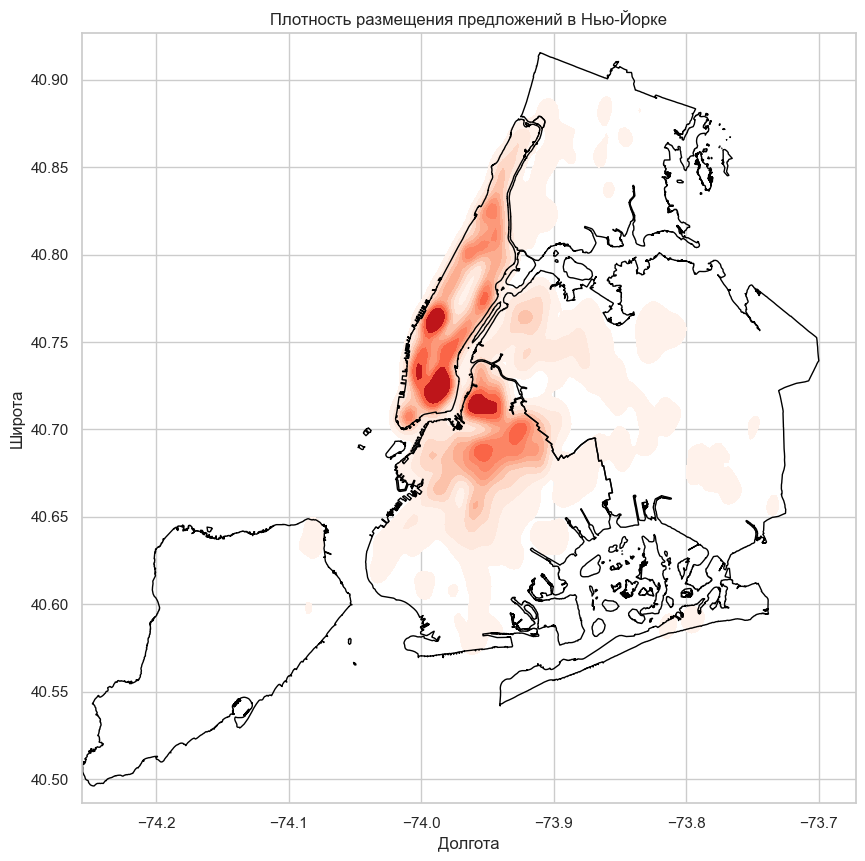

In [75]:
url = ("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/"
       "ArcGIS/rest/services/NYC_Borough_Boundary/FeatureServer/0/"
       "query?where=1%3D1&outFields=*&f=geojson")

response = requests.get(url)
response.raise_for_status()

geojson_bytes = io.BytesIO(response.content)

nyc = gpd.read_file(geojson_bytes).to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(10, 10))

nyc.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

sns.kdeplot(
    x=df["longitude"],
    y=df["latitude"],
    fill=True,
    cmap="Reds",
    bw_adjust=0.5,
    ax=ax
)

plt.title("Плотность размещения предложений в Нью-Йорке")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

##### 4.число отзывов - цена/районы NY

In [77]:
neighbourhood_price_number_of_reviews_df = df.merge(locality, 
                                                    on = ['neigh_id'], 
                                                    how = 'left'
                                                   )[['neighbourhood_group', 'neighbourhood', 'price', 'number_of_reviews']]
neighbourhood_price_number_of_reviews_df

,neighbourhood_group,neighbourhood,price,number_of_reviews
0,Brooklyn,Kensington,149,9
1,Manhattan,Midtown,225,45
2,Manhattan,Harlem,150,0
3,Brooklyn,Clinton Hill,89,270
4,Manhattan,East Harlem,80,9
...,...,...,...,...
48668,Brooklyn,Bedford-Stuyvesant,70,0
48669,Brooklyn,Bushwick,40,0
48670,Manhattan,Harlem,115,0
48671,Manhattan,Hell's Kitchen,55,0


In [78]:
tmp = neighbourhood_price_number_of_reviews_df \
            .groupby(['neighbourhood_group', 'neighbourhood'])['price'] \
            .quantile([0.25, 0.75]) \
            .reset_index()
tmp = tmp.pivot(index = ['neighbourhood_group', 'neighbourhood'], columns='level_2', \
            values = 'price') \
            .reset_index() \
            .rename(columns = {0.25:'q1', 0.75:'q3'})
tmp.columns.name = None
tmp.head(3)

,neighbourhood_group,neighbourhood,q1,q3
0,Bronx,Allerton,47.0,104.75
1,Bronx,Baychester,64.5,85.00
2,Bronx,Belmont,30.0,99.25


In [79]:
# выставляем тип в зависимости от медианы по району

In [80]:
df_merge = neighbourhood_price_number_of_reviews_df.merge(tmp, 
                                                          on = ['neighbourhood_group', 'neighbourhood'], 
                                                          how = 'left'
                                                         )
df_merge['price_clean'] = pd.to_numeric(df_merge['price'], errors='coerce')
conditions = [
    df_merge['price_clean'] < df_merge['q1'], 
    df_merge['price_clean'] < df_merge['q3'], 
    df_merge['price_clean'] < df_merge['q3'] + 1.5 * (df_merge['q3'] - df_merge['q1']),
    df_merge['q1'].isna() | df_merge['q3'].isna() | df_merge['price_clean'].isna()
    
]
choices = ['low', 'medium', 'high', 'error']
df_merge['price_type'] = np.select(conditions, choices, default='premium')
df_merge

,neighbourhood_group,neighbourhood,price,number_of_reviews,q1,q3,price_clean,price_type
0,Brooklyn,Kensington,149,9,49.0,100.0,149,high
1,Manhattan,Midtown,225,45,145.0,339.0,225,medium
2,Manhattan,Harlem,150,0,65.0,133.0,150,high
3,Brooklyn,Clinton Hill,89,270,79.0,175.0,89,medium
4,Manhattan,East Harlem,80,9,72.0,150.0,80,medium
...,...,...,...,...,...,...,...,...
48668,Brooklyn,Bedford-Stuyvesant,70,0,55.0,125.0,70,medium
48669,Brooklyn,Bushwick,40,0,50.0,99.0,40,low
48670,Manhattan,Harlem,115,0,65.0,133.0,115,medium
48671,Manhattan,Hell's Kitchen,55,0,110.0,239.0,55,low


In [81]:
df_merge['price_type'].value_counts()

price_type
medium     24355
low        11577
high        9690
premium     3051
Name: count, dtype: int64

In [82]:
df_merge['price_type'].isna().sum()

0

In [83]:
df_merge_group=df_merge.groupby('price_type').agg({'number_of_reviews':['median', 'count']})
df_merge_group

number_of_reviews       
                      median  count
price_type                         
high                     6.0   9690
low                      4.0  11577
medium                   6.0  24355
premium                  4.0   3051

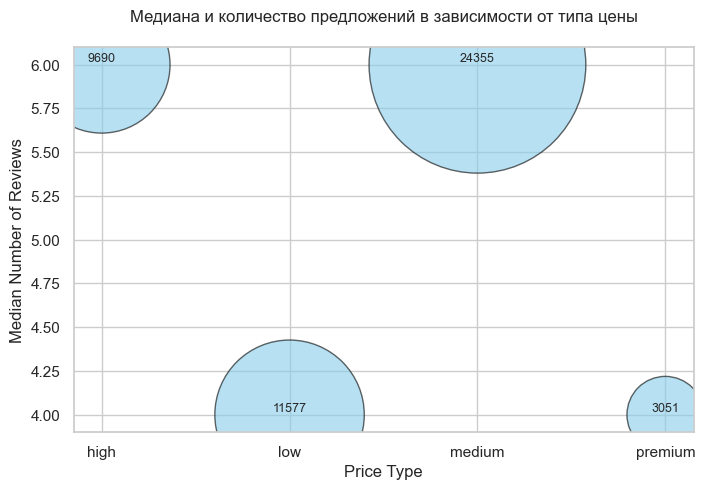

In [84]:
df_plot = df_merge_group.reset_index()

price_types = df_plot['price_type']
median_vals = df_plot[('number_of_reviews', 'median')]
count_vals = df_plot[('number_of_reviews', 'count')]

plt.figure(figsize=(8, 5))

sizes = count_vals / 100

plt.scatter(price_types, median_vals, s=sizes * 100, alpha=0.6, color='skyblue', edgecolors='black')

plt.title('Медиана и количество предложений в зависимости от типа цены\n')
plt.xlabel('Price Type')
plt.ylabel('Median Number of Reviews')

for i, row in df_plot.iterrows():
    plt.text(row['price_type'], row[('number_of_reviews', 'median')], str(row[('number_of_reviews', 'count')]),
             ha='center', va='bottom', fontsize=9)

plt.show()

##### 5. Кореляционная матрица

In [86]:
corr_matrix = df[numeric].corr()

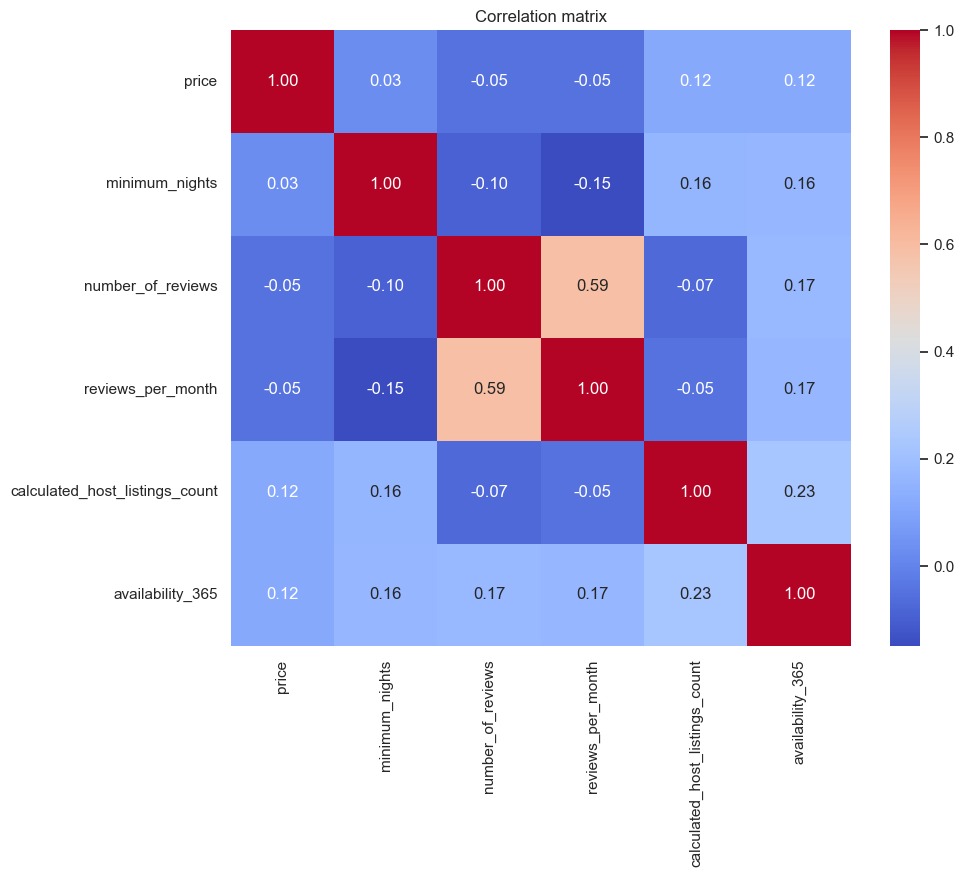

In [87]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

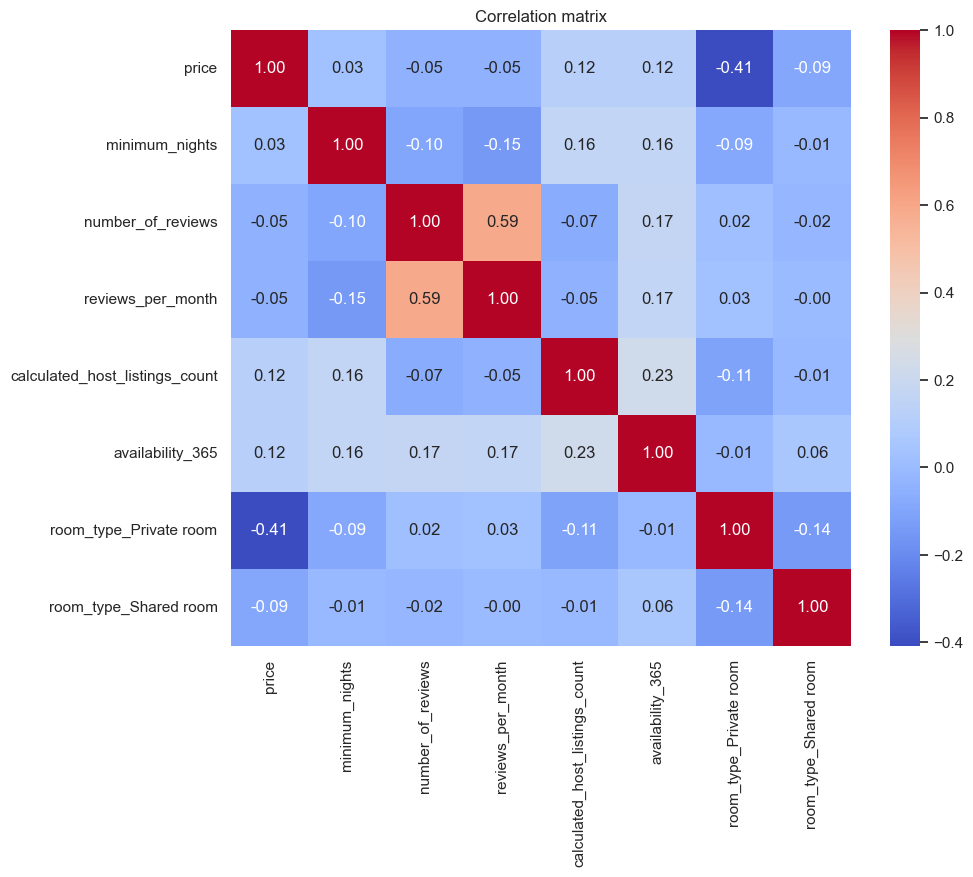

In [88]:
cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
        'calculated_host_listings_count', 'availability_365', 'room_type']

df_encoded = pd.get_dummies(df[cols], drop_first=True)

corr_matrix = df_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

#### Результаты 

## Проверка гипотиз

In [91]:
from scipy import stats
import pingouin as pg

In [92]:
# проверить все еще раз на параметричсеких тестах. ПОсле логарифмирования цен они показывают близкое к нормальному распределение

In [93]:
hosts.head()

,host_id,host_name
0,2787,John
1,2845,Jennifer
2,4632,Elisabeth
3,4869,LisaRoxanne
4,7192,Laura


In [94]:
locality.head()

,neigh_id,neighbourhood_group,neighbourhood
0,192,Bronx,Schuylerville
1,134,Bronx,North Riverdale
2,133,Bronx,Parkchester
3,131,Bronx,Co-op City
4,128,Bronx,Soundview


In [95]:
df.head()

,id,name,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neigh_id
0,2539,Clean & quiet apt home by the park,2787,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,2
3,3831,Cozy Entire Floor of Brownstone,4869,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4


### H1	Средняя цена аренды в районе Manhattan выше, чем в других районах

In [97]:
df_locol_price = df.merge(locality, on = 'neigh_id')[['neighbourhood_group', 'price']]

In [98]:
manhetan_df = df_locol_price.query('neighbourhood_group == "Manhattan"')
other_df = df_locol_price.query('neighbourhood_group != "Manhattan"')

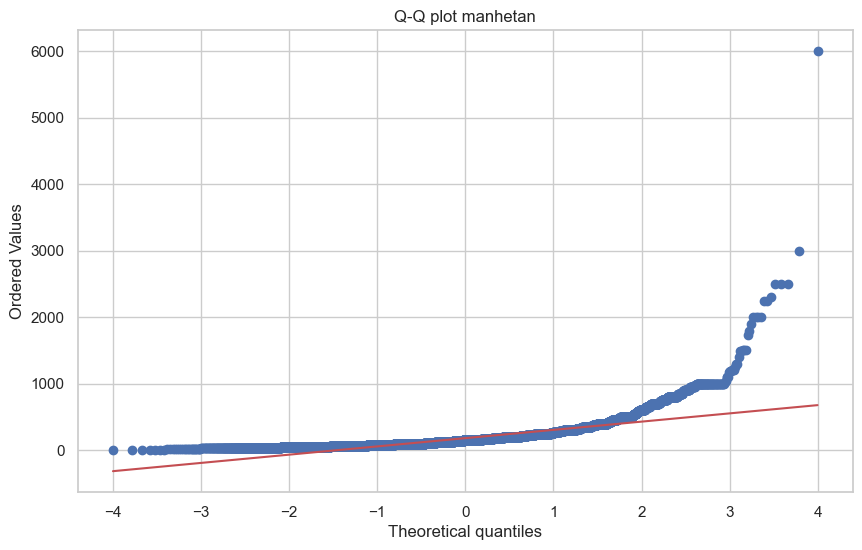

Не нормальное


In [99]:
location_price  = manhetan_df.price
stats.probplot(manhetan_df.price, dist = 'norm', plot = plt)
plt.title(f"Q-Q plot manhetan")
plt.show()
stand_local_price = (location_price - location_price.mean())/location_price.std()
stat1, p1 = stats.normaltest(stand_local_price)
stand_local_price_log = (np.log(location_price) - np.log(location_price).mean())/np.log(location_price).std()
stat2, p2 = stats.normaltest(stand_local_price_log)
if p2 > 0.05 or p1 > 0.05:
    print(f'Нормальное')
else:
    print(f'Не нормальное')

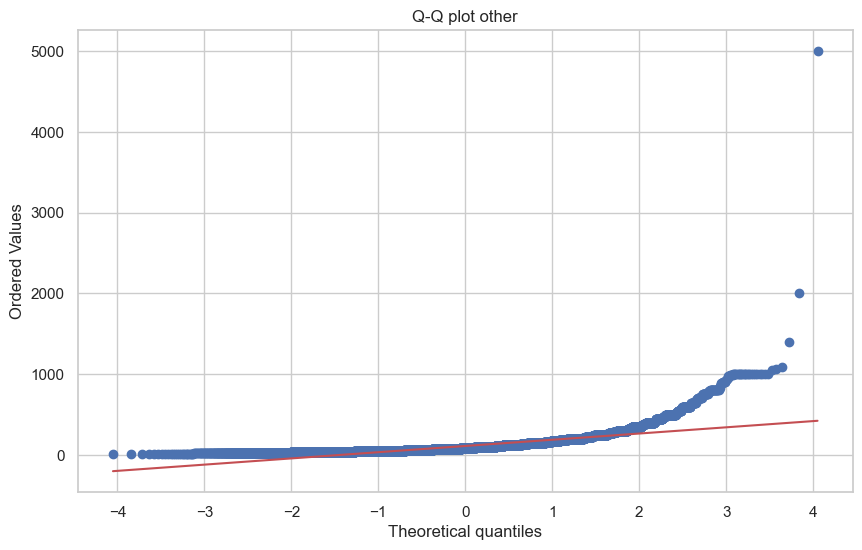

Не нормальное


In [100]:
other_price  = other_df.price
stats.probplot(other_price, dist = 'norm', plot = plt)
plt.title(f"Q-Q plot other")
plt.show()
stand_local_price = (other_price - other_price.mean())/other_price.std()
stat1, p1 = stats.normaltest(stand_local_price)
stand_local_price_log = (np.log(other_price) - np.log(other_price).mean())/np.log(other_price).std()
stat2, p2 = stats.normaltest(stand_local_price_log)
if p2 > 0.05 or p1 > 0.05:
    print(f'Нормальное')
else:
    print(f'Не нормальное')

In [101]:
pg.mwu(location_price, other_price, alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,414942259.5,greater,0.0,0.420267,0.710134


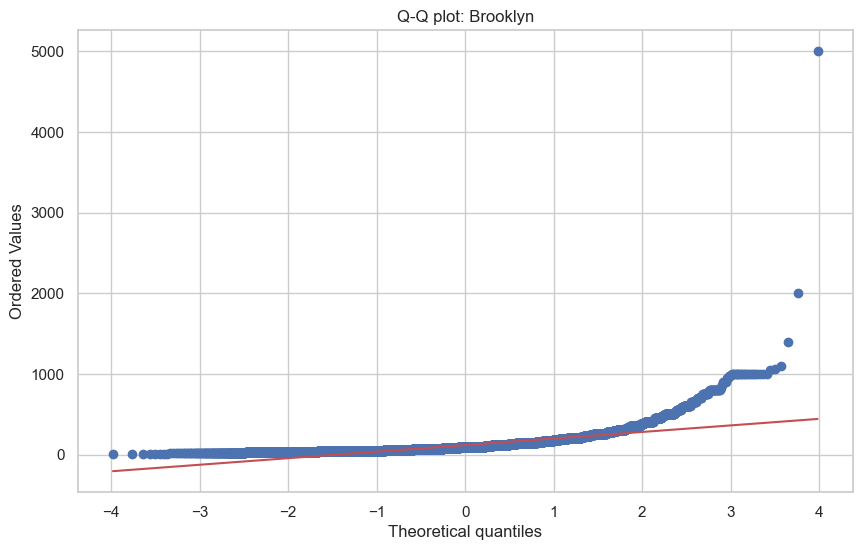

Не нормальное Brooklyn


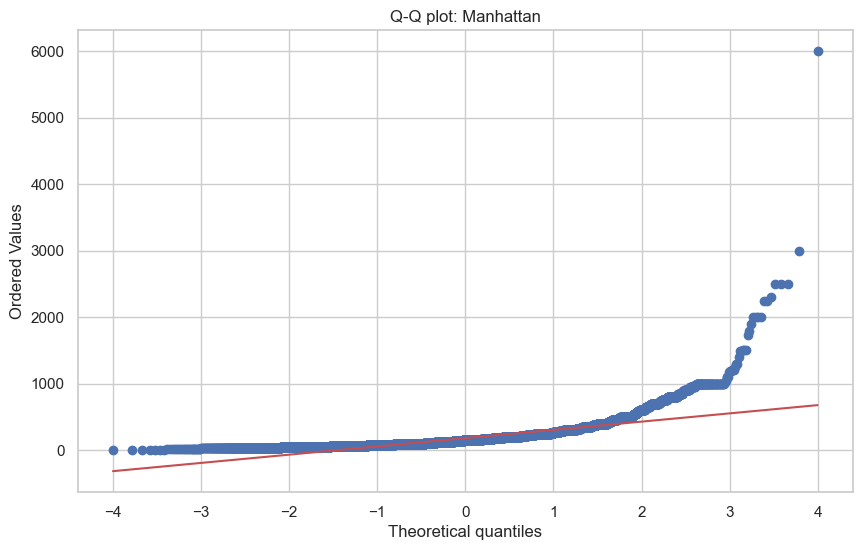

Не нормальное Manhattan


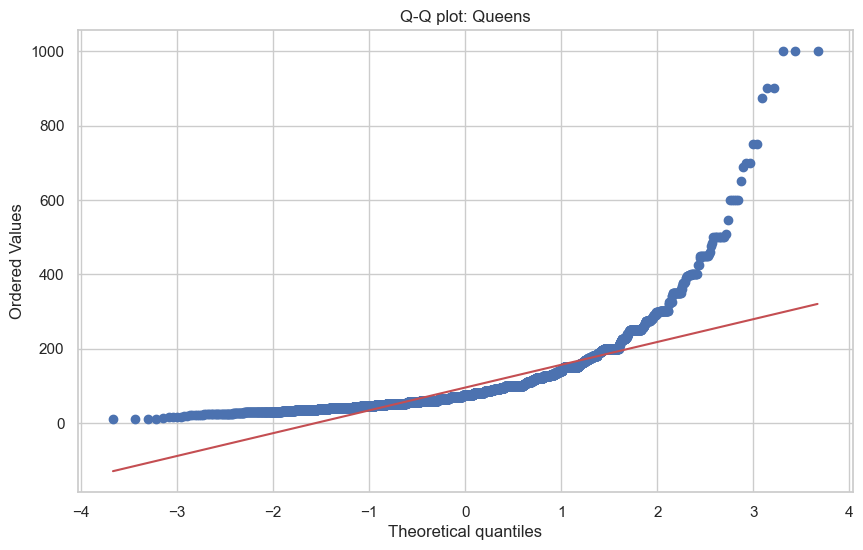

Не нормальное Queens


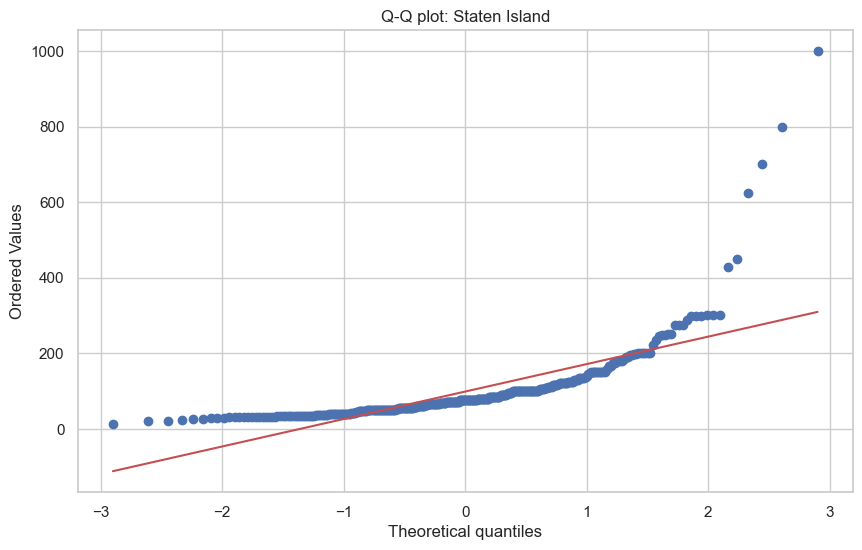

Не нормальное Staten Island


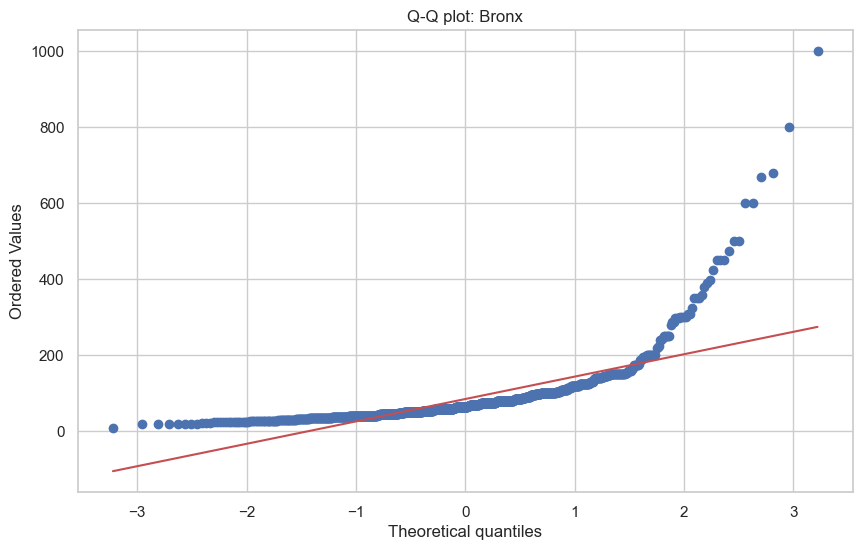

Не нормальное Bronx


In [102]:
for n in df_locol_price.neighbourhood_group.unique():
    location_price  = df_locol_price.query('neighbourhood_group == @n').price
    stats.probplot(location_price, dist = 'norm', plot = plt)
    plt.title(f"Q-Q plot: {n}")
    plt.show()
    stand_local_price = (location_price - location_price.mean())/location_price.std()
    stat1, p1 = stats.normaltest(stand_local_price)
    stand_local_price_log = (np.log(location_price) - np.log(location_price).mean())/np.log(location_price).std()
    stat2, p2 = stats.normaltest(stand_local_price_log)
    if p2 > 0.05 or p1 > 0.05:
        print(f'Нормальное {n}')
    else:
        print(f'Не нормальное {n}')

In [103]:
# Test Kruskal-Wallis

In [104]:
pg.kruskal(data=df_locol_price, dv='price', between='neighbourhood_group')


,Source,ddof1,H,p-unc
Kruskal,neighbourhood_group,4,6978.348963,0.0


In [105]:
posthoc_holm = pg.pairwise_tests(data=df_locol_price, dv='price', between='neighbourhood_group',
                                 parametric=False, padjust='holm', alternative='greater')
posthoc_bonf = pg.pairwise_tests(data=df_locol_price, dv='price', between='neighbourhood_group',
                                 parametric=False, padjust='bonf', alternative='greater')


print("Значимые пары с Holm:")
print(posthoc_holm[(posthoc_holm['p-corr'] < 0.05)&(posthoc_holm['A'] == 'Manhattan')][['A', 'B', 'p-corr', 'hedges']])

print("\nЗначимые пары с Bonferroni:")
print(posthoc_bonf[(posthoc_bonf['p-corr'] < 0.05)&(posthoc_bonf['A'] == 'Manhattan')][['A', 'B', 'p-corr', 'hedges']])

Значимые пары с Holm:
           A              B        p-corr    hedges
7  Manhattan         Queens  0.000000e+00  0.618092
8  Manhattan  Staten Island  3.488958e-69  0.546200

Значимые пары с Bonferroni:
           A              B        p-corr    hedges
7  Manhattan         Queens  0.000000e+00  0.618092
8  Manhattan  Staten Island  4.361197e-69  0.546200


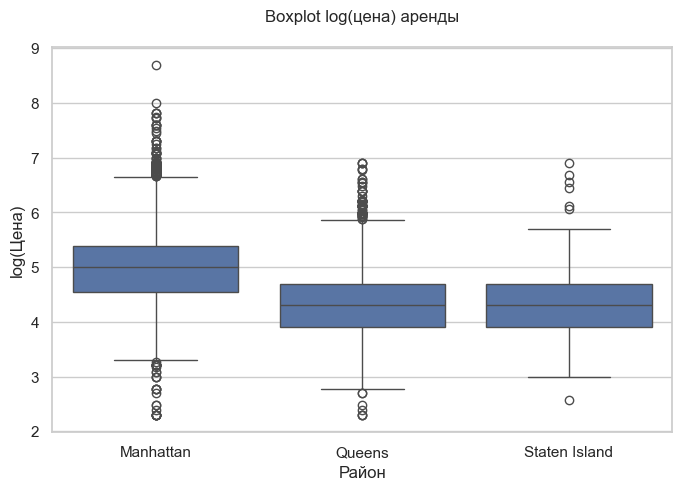

In [106]:
subset = df_locol_price[df_locol_price['neighbourhood_group'].isin(['Manhattan', 'Queens', 'Staten Island'])].copy()
subset['log_price'] = np.log(subset['price'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=subset, x='neighbourhood_group', y='log_price')

plt.title('Boxplot log(ценa) аренды\n')
plt.xlabel('Район')
plt.ylabel('log(Цена)')
plt.show()

### H2	Объекты с типом жилья Entire home/apt имеют более высокую цену, чем комнаты	

In [108]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [109]:
entrie_pice_df = df.query('room_type == "Entire home/apt"')[['room_type', 'price']]
shared_price_df = df.query('room_type == "Shared room"')[['room_type', 'price']]

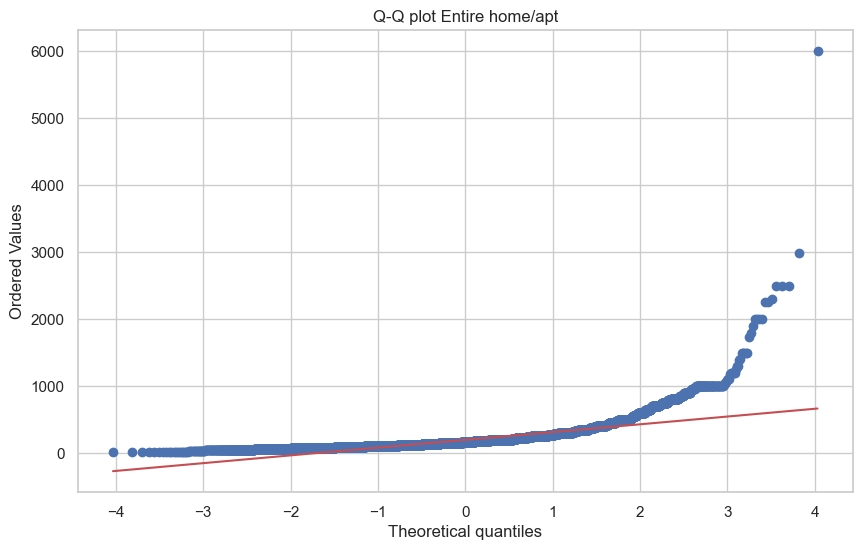

Не нормальное


In [110]:
entrie_price  = entrie_pice_df.price
stats.probplot(entrie_price, dist = 'norm', plot = plt)
plt.title(f"Q-Q plot Entire home/apt")
plt.show()
stand_local_price = (entrie_price - entrie_price.mean())/entrie_price.std()
stat1, p1 = stats.normaltest(stand_local_price)
stand_local_price_log = (np.log(entrie_price) - np.log(entrie_price).mean())/np.log(entrie_price).std()
stat2, p2 = stats.normaltest(stand_local_price_log)
if p2 > 0.05 or p1 > 0.05:
    print(f'Нормальное')
else:
    print(f'Не нормальное')

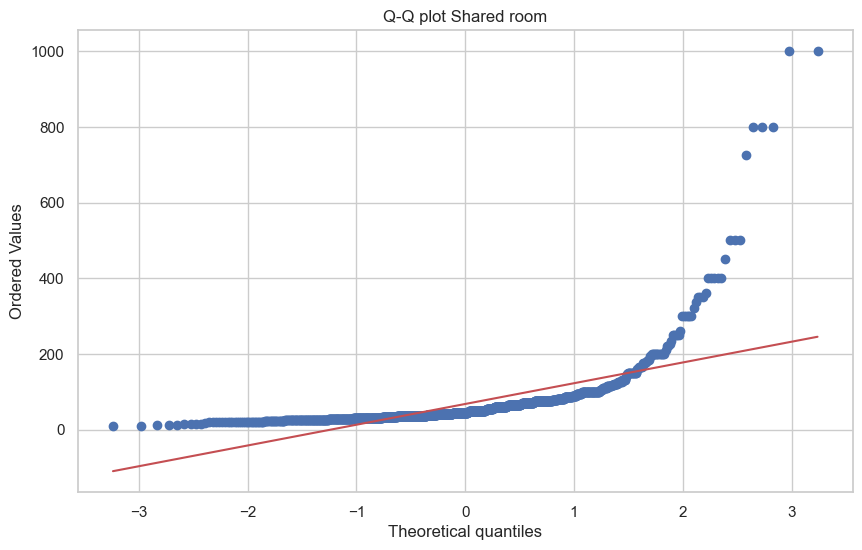

Не нормальное


In [111]:
other_price  = shared_price_df.price
stats.probplot(other_price, dist = 'norm', plot = plt)
plt.title(f"Q-Q plot Shared room")
plt.show()
stand_local_price = (other_price - other_price.mean())/other_price.std()
stat1, p1 = stats.normaltest(stand_local_price)
stand_local_price_log = (np.log(other_price) - np.log(other_price).mean())/np.log(other_price).std()
stat2, p2 = stats.normaltest(stand_local_price_log)
if p2 > 0.05 or p1 > 0.05:
    print(f'Нормальное')
else:
    print(f'Не нормальное')

In [112]:
stat, p = stats.levene(entrie_price, other_price)
p

4.39280574899601e-36

In [113]:
pg.mwu(entrie_price, other_price, alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,26958059.5,greater,0.0,0.84903,0.924515


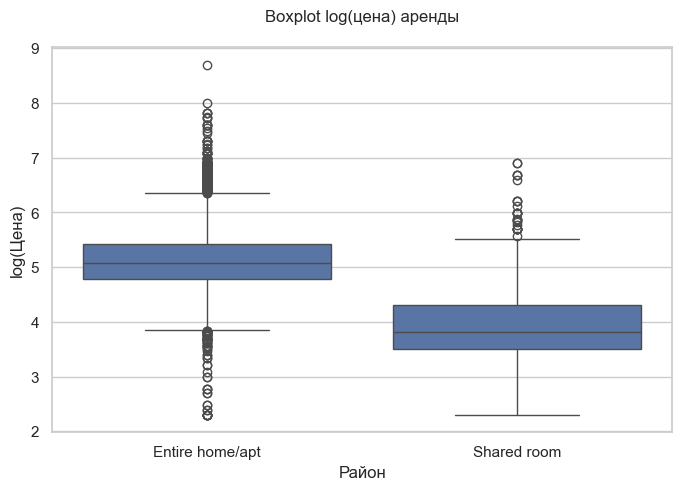

In [114]:
subset = df[df['room_type'].isin(['Entire home/apt', "Shared room"])][['room_type', 'price']].copy()
subset['log_price'] = np.log(subset['price'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=subset, x='room_type', y='log_price')

plt.title('Boxplot log(ценa) аренды\n')
plt.xlabel('Район')
plt.ylabel('log(Цена)')
plt.show()

### H3	У популярных хостов (больше 100 отзывов) — ниже цена, чем у новых	

In [116]:
# Н0 цена одинаковая и у популярных хостов и у новых

In [117]:
popular_host_df = df.query('number_of_reviews > 100')[['id',  'price']]
not_popular_df = df.query('number_of_reviews <= 100')[['id',  'price']]


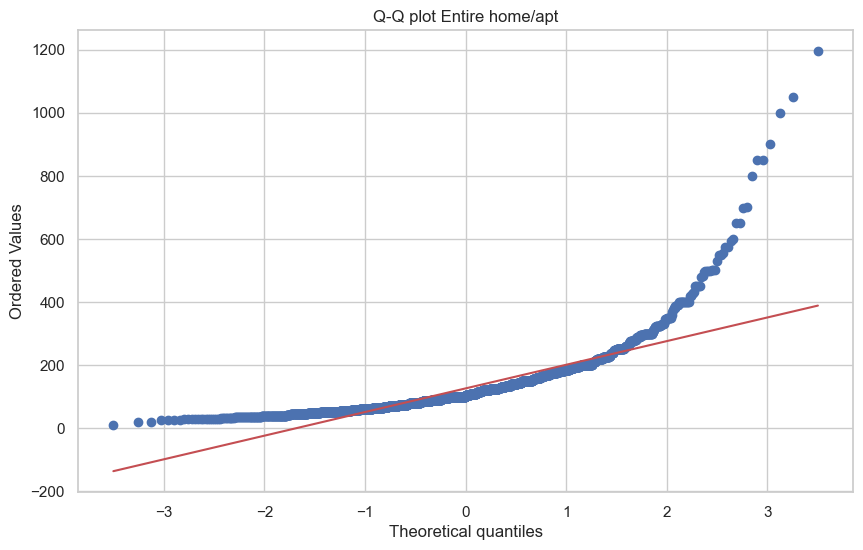

Не нормальное


In [118]:
pop_price  = popular_host_df.price
stats.probplot(pop_price, dist = 'norm', plot = plt)
plt.title(f"Q-Q plot Entire home/apt")
plt.show()
stand_local_price = (pop_price - pop_price.mean())/pop_price.std()
stat1, p1 = stats.normaltest(stand_local_price)
stand_local_price_log = (np.log(pop_price) - np.log(pop_price).mean())/np.log(pop_price).std()
stat2, p2 = stats.normaltest(stand_local_price_log)
if p2 > 0.05 or p1 > 0.05:
    print(f'Нормальное')
else:
    print(f'Не нормальное')

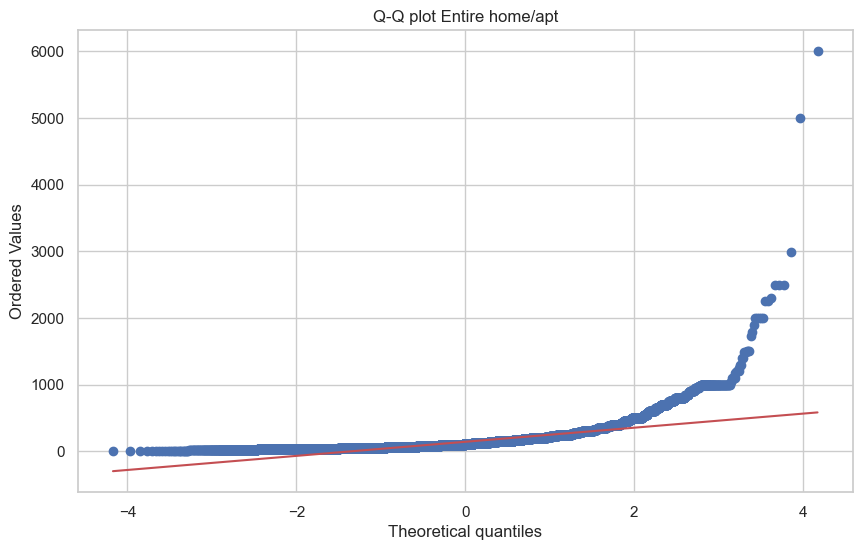

Не нормальное


In [119]:
not_pop_price  = not_popular_df.price
stats.probplot(not_pop_price, dist = 'norm', plot = plt)
plt.title(f"Q-Q plot Entire home/apt")
plt.show()
stand_local_price = (not_pop_price - not_pop_price.mean())/not_pop_price.std()
stat1, p1 = stats.normaltest(stand_local_price)
stand_local_price_log = (np.log(not_pop_price) - np.log(not_pop_price).mean())/np.log(not_pop_price).std()
stat2, p2 = stats.normaltest(stand_local_price_log)
if p2 > 0.05 or p1 > 0.05:
    print(f'Нормальное')
else:
    print(f'Не нормальное')

In [120]:
stat, p = stats.levene(pop_price, not_pop_price)
p

1.5649740732211194e-22

In [121]:
pg.mwu(pop_price, not_pop_price, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,66470943.5,two-sided,0.00949,-0.028242,0.485879


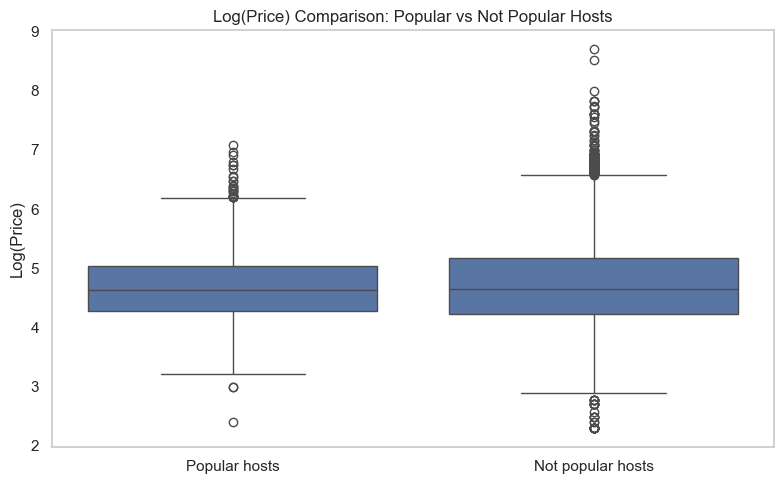

In [122]:
df_vis = pd.DataFrame({
    'price': np.log(np.concatenate([pop_price, not_pop_price])),
    'Group': ['Popular hosts'] * len(pop_price) + ['Not popular hosts'] * len(not_pop_price)
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='price', data=df_vis)
plt.title('Log(Price) Comparison: Popular vs Not Popular Hosts')
plt.ylabel('Log(Price)')
plt.xlabel('')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### H4	В районах с высокой плотностью предложений — цена ниже, т.к. высокая конкуренция

In [124]:
df.head(1)

,id,name,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neigh_id
0,2539,Clean & quiet apt home by the park,2787,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0


<Axes: >

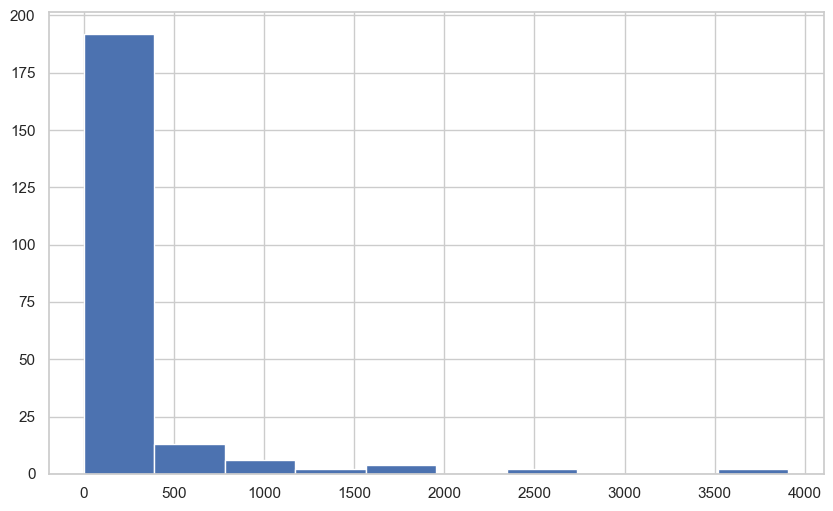

In [125]:
df.neigh_id.value_counts().hist()

In [126]:
df.groupby('neigh_id', as_index=False).agg(count = ('id','count')).query('count > 1000').sort_values('count', ascending=False).reset_index(drop = True)

,neigh_id,count
0,12,3909
1,6,3702
2,2,2652
3,21,2460
4,8,1952
5,7,1951
6,19,1844
7,28,1789
8,15,1560
9,1,1529


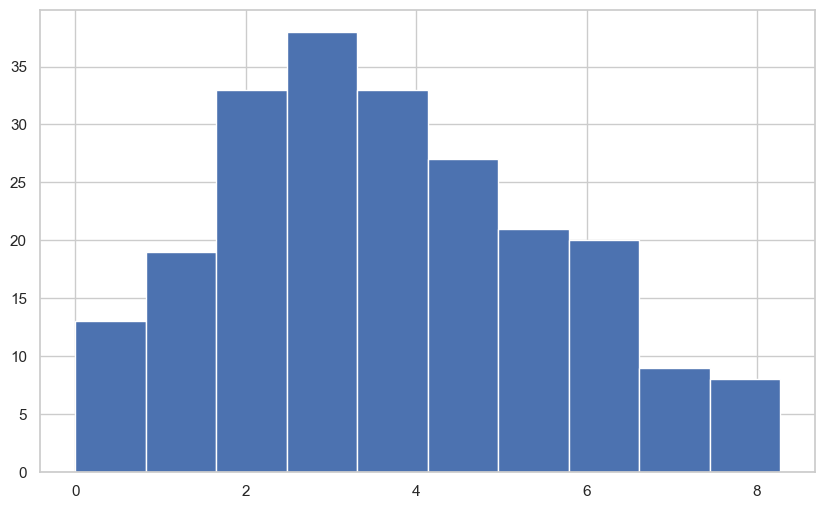

In [127]:
tmp = df[['neigh_id', 'id']]
tmp = df.groupby('neigh_id', as_index=False).agg(count = ('id', 'count'))
tmp['log_count'] = np.log(tmp['count'])
tmp['log_count'].hist()
top_neighs = tmp.query('log_count > 7')[['neigh_id','count']].sort_values('count')

In [128]:
high_density = df[df['neigh_id'].isin(top_neighs['neigh_id'])][['neigh_id', 'price']]
low_density = df[~df['neigh_id'].isin(top_neighs['neigh_id'])][['neigh_id', 'price']]

<Axes: >

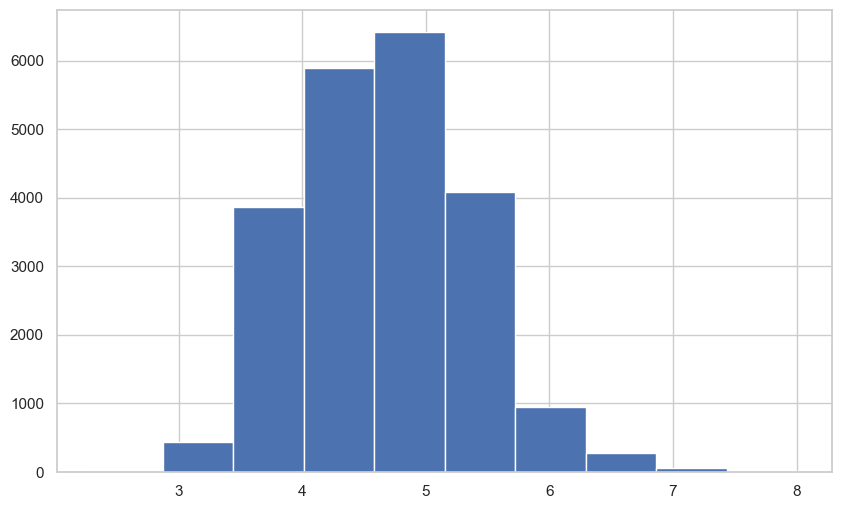

In [129]:
np.log(low_density['price']).hist()

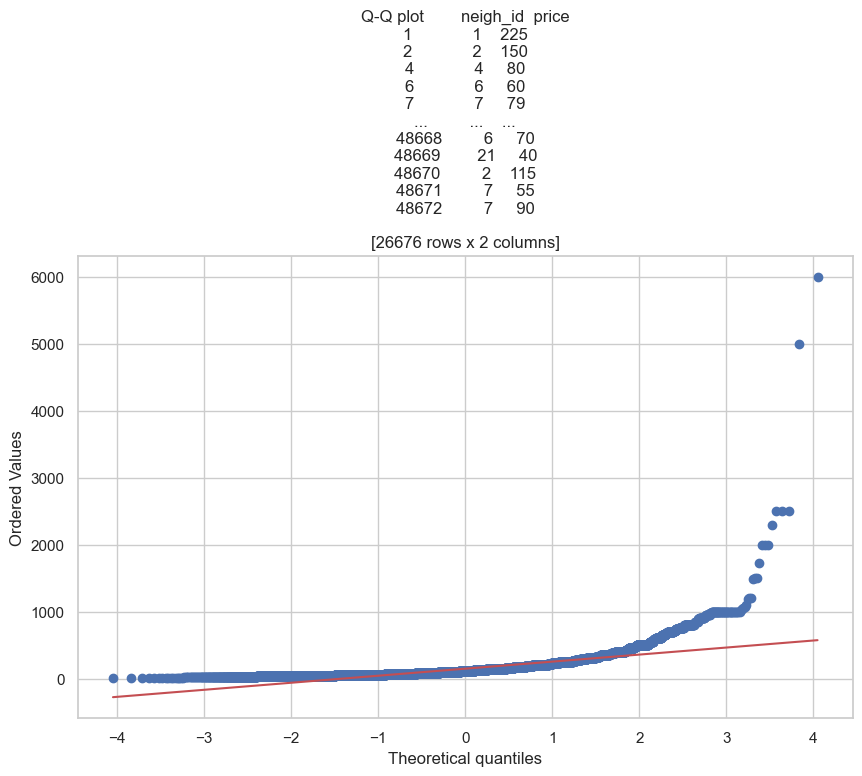

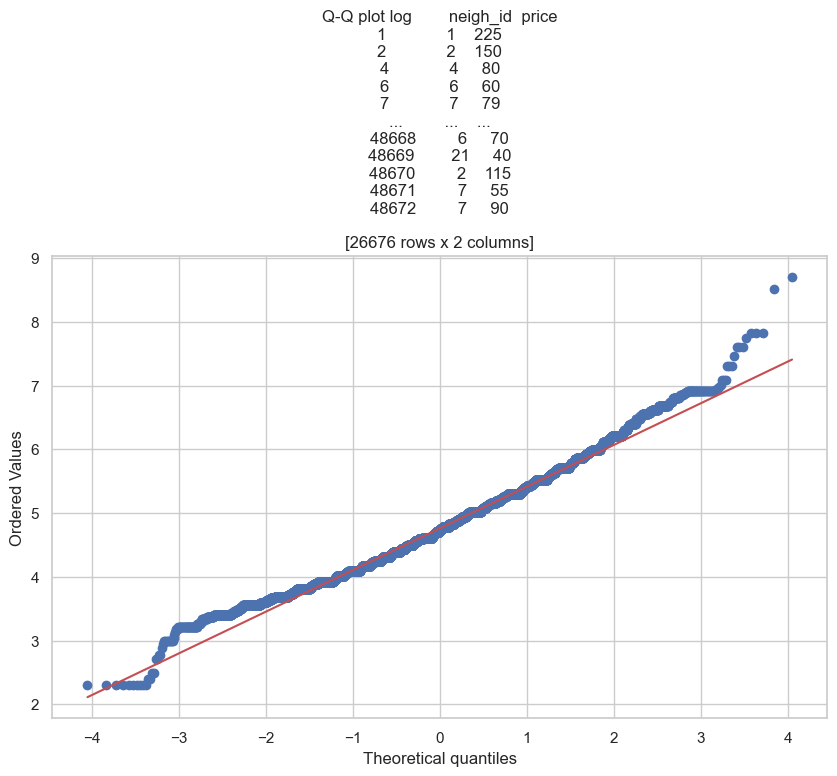

Не нормальное


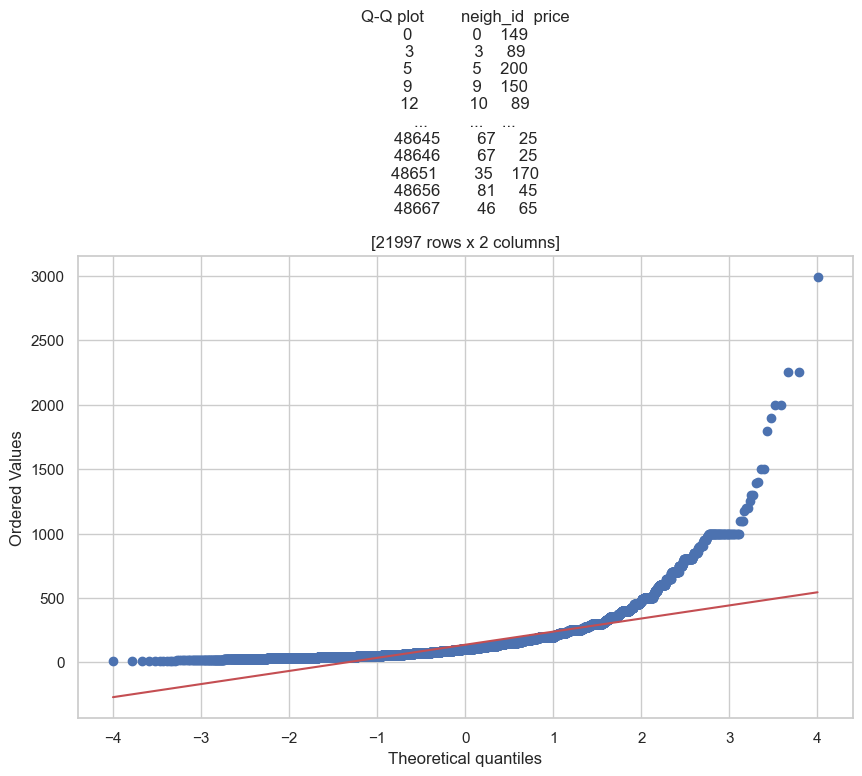

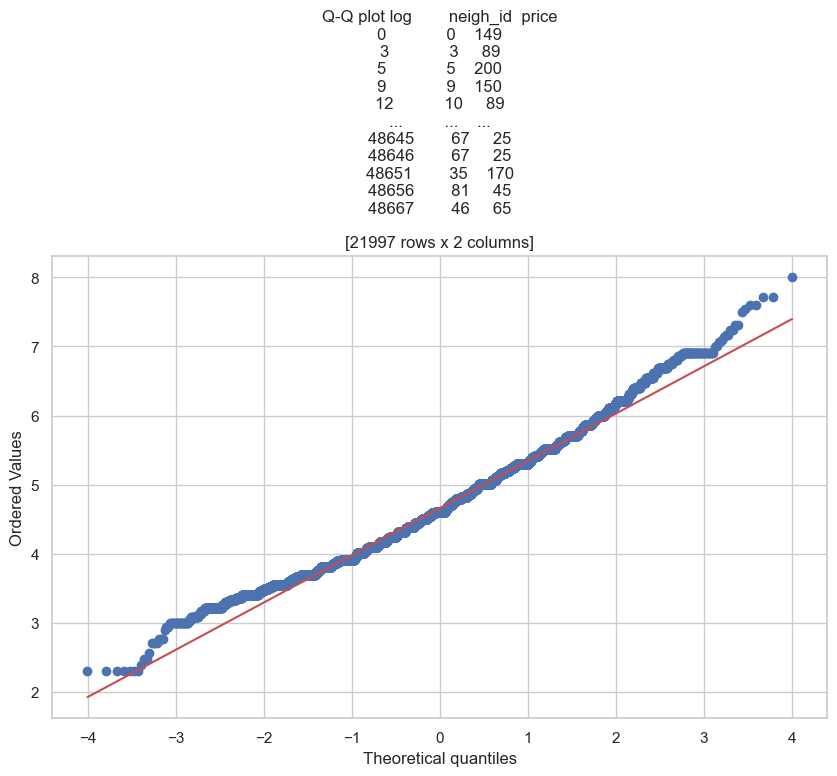

Не нормальное


In [130]:
for i in [high_density, low_density]:
    pop_price  = i.price
    stats.probplot(pop_price, dist = 'norm', plot = plt)
    plt.title(f"Q-Q plot {i}")
    plt.show()
    stats.probplot(np.log(pop_price), dist = 'norm', plot = plt)
    plt.title(f"Q-Q plot log {i}")
    plt.show()
    stand_local_price = (pop_price - pop_price.mean())/pop_price.std()
    stat1, p1 = stats.normaltest(stand_local_price)
    stand_local_price_log = (np.log(pop_price) - np.log(pop_price).mean())/np.log(pop_price).std()
    stat2, p2 = stats.normaltest(stand_local_price_log)
    if p2 > 0.05 or p1 > 0.05:
        print(f'Нормальное')
    else:
        print(f'Не нормальное')

In [131]:
stats.levene(high_density.price, low_density.price)

LeveneResult(statistic=8.80136258033218, pvalue=0.003011518843855444)

In [132]:
stat, p = stats.ttest_ind(high_density.price, low_density.price, equal_var=False)
stat, p

(9.271401071109754, 1.9110402550359696e-20)

In [133]:
pg.mwu(high_density.price, low_density.price)

,U-val,alternative,p-val,RBC,CLES
MWU,318337165.0,two-sided,8.245923e-59,0.085009,0.542504


In [134]:
pg.ttest(high_density.price, low_density.price, correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.271401,47883.265886,two-sided,1.911040e-20,"[8.56, 13.14]",0.083915,4.522e+16,1.0


In [135]:
pg.ttest(np.log(high_density.price), np.log(low_density.price), correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.986739,46084.54931,two-sided,2.256497e-57,"[0.09, 0.11]",0.146219,2.225e+53,1.0


### Н5  Хосты с большим количеством объектов выставляют более дешёвые цены (экономия на масштабе)

In [137]:
df.host_id.value_counts().sort_values()

host_id
221548872      1
4425467        1
4372934        1
1896642        1
4233879        1
            ... 
16098958      96
137358866    103
30283594     119
107434423    232
219517861    327
Name: count, Length: 37300, dtype: int64

In [138]:
tmp = df.groupby('host_id', as_index=False).agg(count = ('id', 'count'))
big_hosts = tmp[tmp['count'] > 50].reset_index(drop = True)['host_id'].tolist()
medium_hosts = tmp[tmp['count'].between(10, 50)].reset_index(drop = True)['host_id'].tolist()
low_hosts = tmp[tmp['count'].between(0, 9)].reset_index(drop = True)['host_id'].tolist()

In [139]:
def help_group(val):
    if isinstance(val, (int, str)):
        if val in big_hosts:
            return 'big'
        if val in medium_hosts:
            return 'medium'
        if val in low_hosts:
            return 'small'
    else:
        return 'unknown'

In [140]:
host_group_df = df[['host_id', 'price']].copy()
host_group_df['group']  = host_group_df['host_id'].apply(help_group)

In [141]:
host_group_df.group.unique()

array(['small', 'medium', 'big'], dtype=object)

In [142]:
host_group_df

,host_id,price,group
0,2787,149,small
1,2845,225,small
2,4632,150,small
3,4869,89,small
4,7192,80,small
...,...,...,...
48668,8232441,70,small
48669,6570630,40,small
48670,23492952,115,small
48671,30985759,55,small


In [143]:
# qq plot, histo log, test (norm, log)

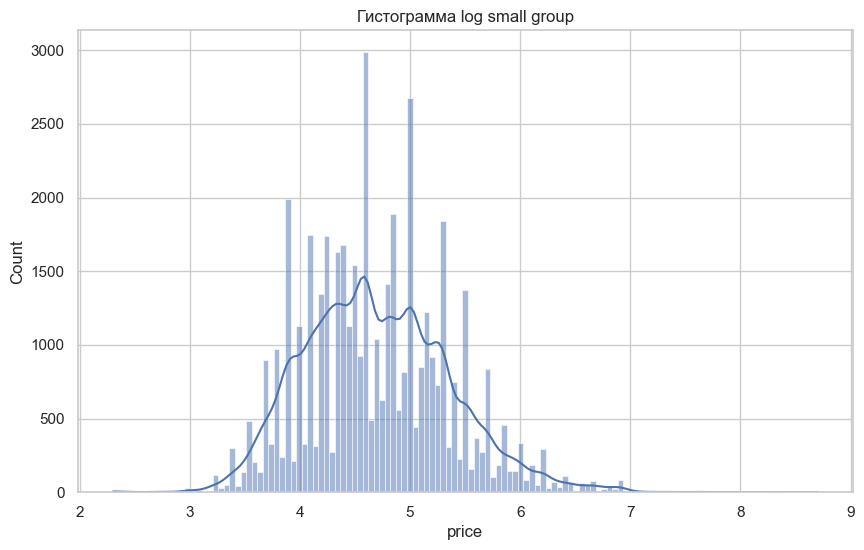

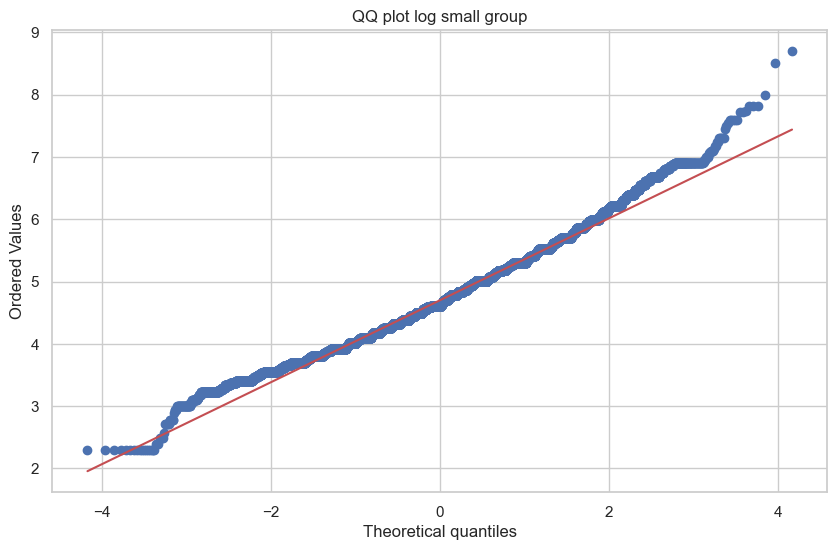

Не нормальное


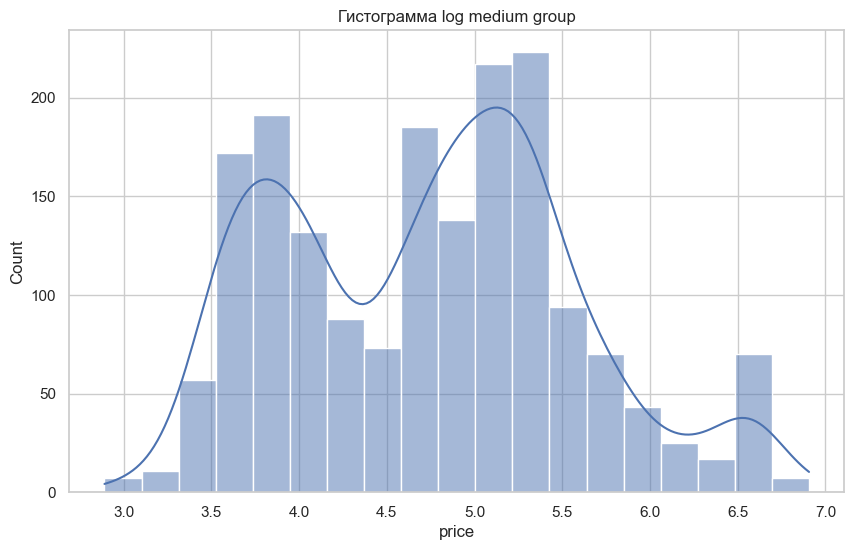

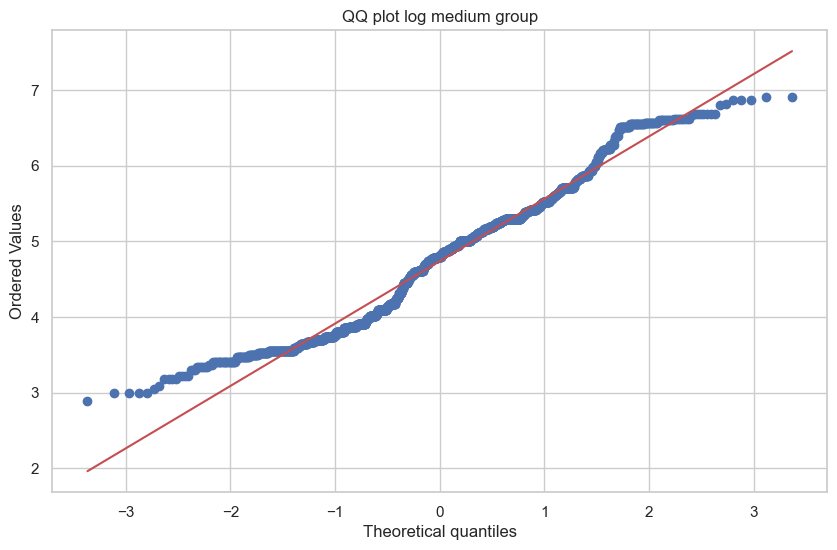

Не нормальное


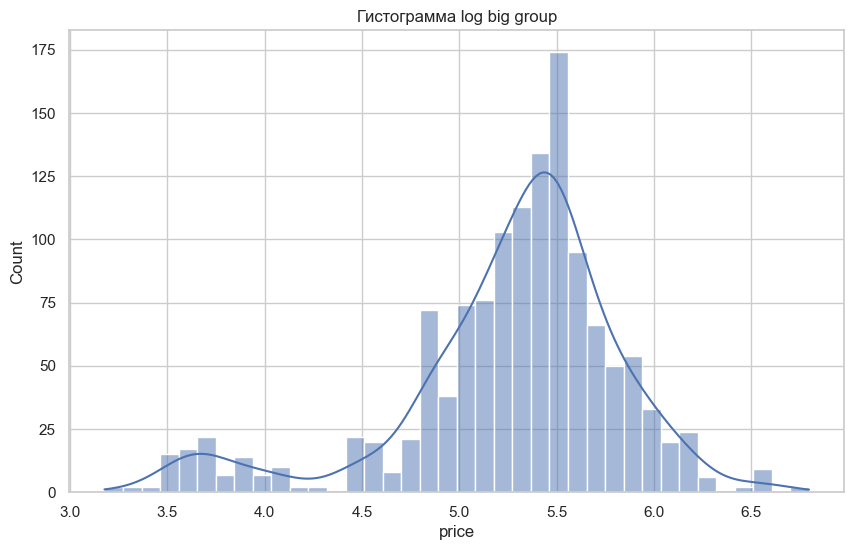

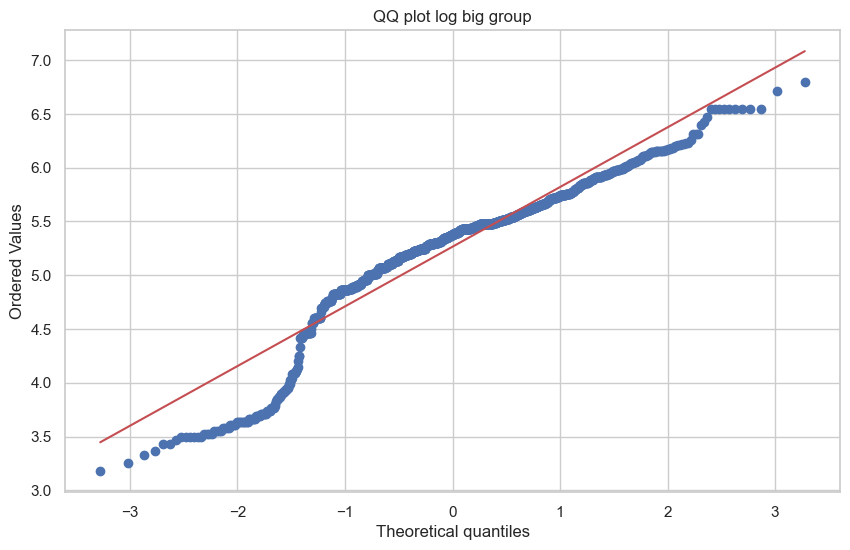

Не нормальное


In [144]:
for i in host_group_df.group.unique():
    price = host_group_df.query('group == @i').price
    sns.histplot(np.log(price), kde = True)
    plt.title(f'Гистограмма log {i} group')
    plt.show()

    stats.probplot(np.log(price), dist = 'norm', plot = plt)
    plt.title(f'QQ plot log {i} group')
    plt.show()

    stand_price = (price - price.mean())/price.std()
    stat1, p1 = stats.normaltest(stand_price)
    stand_price_log = (np.log(price) - np.log(price).mean())/np.log(price).std()
    stat2, p2 = stats.normaltest(stand_price_log)
    if p2 > 0.05 or p1 > 0.05:
        print(f'Нормальное')
    else:
        print(f'Не нормальное')

In [145]:
pg.kruskal(data=host_group_df, dv='price', between='group')

,Source,ddof1,H,p-unc
Kruskal,group,2,1046.549306,5.555276e-228


In [146]:
pg.pairwise_tests(data=host_group_df, dv='price', between='group', parametric=False, padjust='bonf')

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,group,big,medium,False,False,1712609.5,two-sided,1.851916e-92,5.555748e-92,bonf,0.418227
1,group,big,small,False,False,45799515.5,two-sided,6.689742e-232,2.006923e-231,bonf,0.650120
2,group,medium,small,False,False,42411544.5,two-sided,8.763963e-02,2.629189e-01,bonf,0.185323


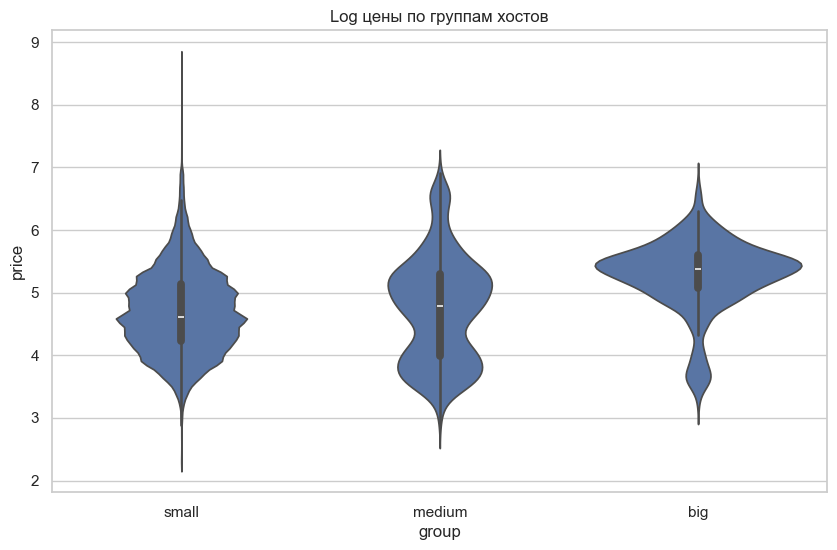

In [147]:
sns.violinplot(data=host_group_df, x='group', y=np.log(host_group_df['price']))
plt.title('Log цены по группам хостов')
plt.show()

## Общий вывод по результатам EDA

In [309]:
df.to_csv('airbnb.csv', index=False)

In [311]:
locality.to_csv('locality.csv', index=False)

In [315]:
hosts.to_csv('hosts.csv', index = False)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48673 entries, 0 to 48672
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48673 non-null  int64         
 1   name                            48658 non-null  object        
 2   host_id                         48673 non-null  int64         
 3   latitude                        48673 non-null  float64       
 4   longitude                       48673 non-null  float64       
 5   room_type                       48673 non-null  object        
 6   price                           48673 non-null  int64         
 7   minimum_nights                  48673 non-null  int64         
 8   number_of_reviews               48673 non-null  int64         
 9   last_review                     38762 non-null  datetime64[ns]
 10  reviews_per_month               48673 non-null  float64       
 11  ca